# Project Topic:-CLUSTERING

In [ ]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from mpl_toolkits.mplot3d import Axes3D #For 3D Plot

import warnings
warnings.filterwarnings('ignore')


!pip install kneed
from kneed import KneeLocator

In [ ]:
#Importing the dataset

data=pd.read_excel('World_development_mesurement (1).xlsx')
data

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  ...  \
0         $54,790,058,957             0.035               $60  ...   
1          $9,129,594,819             0.034               $22  ...   
2          $2,359,122,303             0.043               $15  ...   
3          $5,788,311,645             0.047              $152  ...   
4          $2,610,959,139             0.051               $12  ...   
...                   ...               ...               ...  ...   
2699                  NaN               NaN               NaN  ...   
2700  $16,244,600,000,000             0.179            $8,895  ...   
2701      $50,004,354,667             0.089            $1,308  ...   
2702     $381,286,223,859             0.046              $593  ...   
2703                  NaN               NaN               NaN  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
27

##Basic information of the data

### About Columns:<br>


> Birth Rate: The number of live births per 1,000 people.<br>
CO2 Emissions: The amount of carbon dioxide emitted.<br>
Days to Start Business: The number of days required to start a business.<br>
Ease of Business: A measure of how easy it is to do business in a country.<br>
Energy Usage: The amount of energy consumed.<br>
Health Exp % GDP: Percentage of GDP spent on health expenses.<br>
Hours to do Tax: The number of hours required to prepare and pay taxes.<br>
Infant Mortality Rate: The number of infant deaths per 1,000 live births.<br>
Internet Usage: The percentage of the population using the internet.<br>
Lending Interest: The lending interest rate.<br>
Life Expectancy Female: Average life expectancy for females.<br>
Life Expectancy Male: Average life expectancy for males.<br>
Mobile Phone Usage: The percentage of the population using mobile phones.<br>
Number of Records: The count of records; might be an identifier.<br>
Population 0-14, Population 15-64, Population 65+: Population distribution across age groups.<br>
Population Total: Total population.<br>
Population Urban: Percentage of the population living in urban areas.<br>
> Business Tax Rate: The tax rate for businesses.<br>
Country: The name of the country.<br>
GDP: Gross Domestic Product of the country.<br>
Health Exp/Capita: Health expenditure per capita.<br>
Tourism Inbound: Inbound tourism statistics.<br>
Tourism Outbound: Outbound tourism statistics.<br>

In [ ]:
data.shape

(2704, 25)

In [ ]:
data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [ ]:
#Identifying Numerical and Categorical Columns.

data_types=data.dtypes

numerical_columns=data_types[data_types !='object'].index
print('Numerical Columns: \n',numerical_columns)
categorical_columns=data_types[data_types =='object'].index
print('\n Categorical Columns : \n',categorical_columns)

Numerical Columns: 
 Index(['Birth Rate', 'CO2 Emissions', 'Days to Start Business',
       'Ease of Business', 'Energy Usage', 'Health Exp % GDP',
       'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage',
       'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Number of Records', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban'],
      dtype='object')

 Categorical Columns : 
 Index(['Business Tax Rate', 'Country', 'GDP', 'Health Exp/Capita',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')


Comment:-<br>
* Ideally these columns should be Numerical.
  > Business Tax Rate<br>
  > GDP <br>
  > Health Exp/Capita<br>
  > Tourism Inbound <br>
  > Tourism Outbound

  but as given in the data these columns are categorical in nature.

In [ ]:
#Converting  (Categorical column) to (Numerical column)

# Business Tax Rate - having {%}symbol
# GDP -having {$,}
# Health Exp/Capita -having {$,}
# Tourism Inbound -having {$,}
# Tourism Outbound -having {$,}


data['Business Tax Rate']=data['Business Tax Rate'].replace('[\%]','',regex=True).astype(float)
data['GDP']=data['GDP'].replace('[\$,]','',regex=True).astype(float)
data['Health Exp/Capita']=data['Health Exp/Capita'].replace('[\$,]','',regex=True).astype(float)
data['Tourism Inbound']=data['Tourism Inbound'].replace('[\$,]','',regex=True).astype(float)
data['Tourism Outbound']=data['Tourism Outbound'].replace('[\$,]','',regex=True).astype(float)


print(data.dtypes)

Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object


In [ ]:
#Identifying Numerical and Categorical Columns.

data_types=data.dtypes

numerical_columns=data_types[data_types !='object'].index
print('Numerical Columns: \n',numerical_columns)
categorical_columns=data_types[data_types =='object'].index
print('\n Categorical Columns : \n',categorical_columns)

Numerical Columns: 
 Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

 Categorical Columns : 
 Index(['Country'], dtype='object')


Comment:-<br>
* Now ,if we check there is ony one Categorical column left in the data that is 'Country'.

In [ ]:
#To find the duplicated rows

data.duplicated().sum()

0

##Exploratory Data Analysis

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 32.5 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv

In [ ]:
#Speeding up EDA
sweet_report = sv.analyze(data)
sweet_report.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#Checking for null values

data.isna().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

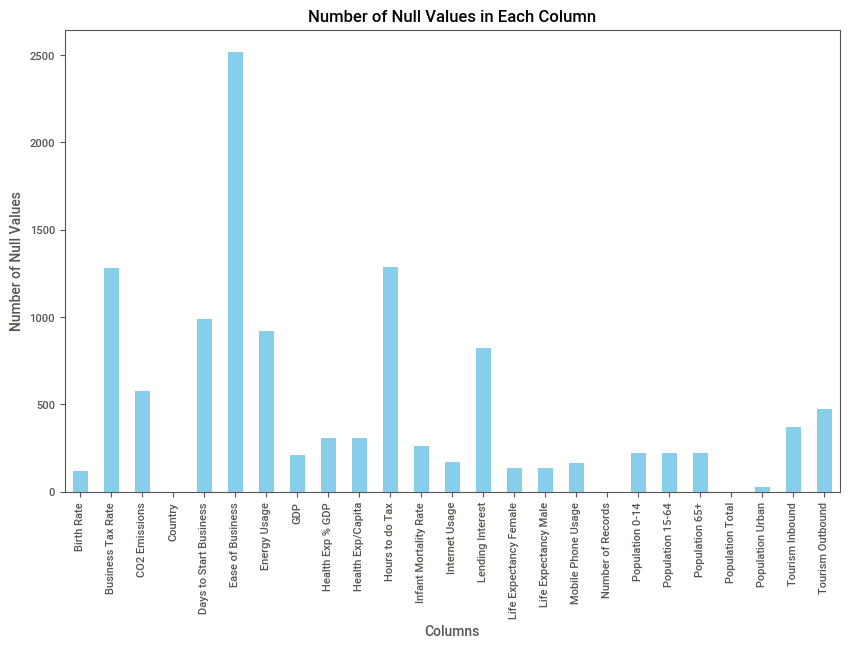

In [ ]:
# Calculate the number of null values for each column
null_counts = data.isna().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()


In [ ]:
#Dropping columns who are having null values more than 30%

# Calculating the percentage of null values for each column
null_percentage = (data.isnull().mean() * 100).round(2)

# Identify columns with more than 30% null values
columns_to_drop = null_percentage[null_percentage > 30].index
print('Columns having null values more than 30% are :-',columns_to_drop,'\n\n')

# Drop columns with more than 30% null values
data1= data.drop(columns=columns_to_drop)

Columns having null values more than 30% are :- Index(['Business Tax Rate', 'Days to Start Business', 'Ease of Business',
       'Energy Usage', 'Hours to do Tax', 'Lending Interest'],
      dtype='object') 




In [ ]:
# List of columns to drop as they are not much significant

columns_to_drop = ['Number of Records', 'Population 0-14', 'Population 15-64','Population 65+']

# Drop specified columns
data2= data1.drop(columns=columns_to_drop)

# Display the updated DataFrame
data2

Birth Rate  CO2 Emissions                   Country           GDP  \
0          0.020        87931.0                   Algeria  5.479006e+10   
1          0.050         9542.0                    Angola  9.129595e+09   
2          0.043         1617.0                     Benin  2.359122e+09   
3          0.027         4276.0                  Botswana  5.788312e+09   
4          0.046         1041.0              Burkina Faso  2.610959e+09   
...          ...            ...                       ...           ...   
2699         NaN            NaN  Turks and Caicos Islands           NaN   
2700       0.013            NaN             United States  1.624460e+13   
2701       0.015            NaN                   Uruguay  5.000435e+10   
2702       0.020            NaN             Venezuela, RB  3.812862e+11   
2703       0.011            NaN     Virgin Islands (U.S.)           NaN   

      Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  \
0                0.035               60.0                  0.034   
1                0.034               22.0                  0.128   
2                0.043               15.0                  0.090   
3                0.047              152.0                  0.054   
4                0.051               12.0                  0.096   
...                ...                ...                    ...   
2699               NaN                NaN                    NaN   
2700             0.179             8895.0                  0.006   
2701             0.089             1308.0                  0.010   
2702             0.046              593.0                  0.013   
2703               NaN                NaN                    NaN   

      Internet Usage  Life Expectancy Female  Life Expectancy Male  \
0                0.0                    71.0                  67.0   
1                0.0                    47.0                  44.0   
2                0.0                    57.0                  53.0   
3                0.0                    52.0                  49.0   
4                0.0                    52.0                  49.0   
...              ...                     ...                   ...   
2699             NaN                     NaN                   NaN   
2700             0.8                    81.0                  76.0   
2701             0.5                    80.0                  74.0   
2702             0.5                    78.0                  72.0   
2703             0.4                    83.0                  76.0   

      Mobile Phone Usage  Population Total  Population Urban  Tourism Inbound  \
0                    0.0          31719449             0.599     1.020000e+08   
1                    0.0          13924930             0.324     3.400000e+07   
2                    0.0           6949366             0.383     7.700000e+07   
3                    0.1           1755375             0.532     2.270000e+08   
4                    0.0          11607944             0.178     2.300000e+07   
...                  ...               ...               ...              ...   
2699                 NaN             32427             0.911              NaN   
2700                 1.0         313873685             0.811     2.000920e+11   
2701                 1.5           3395253             0.948     2.222000e+09   
2702                 1.0          29954782             0.889     9.040000e+08   
2703                 NaN            105275             0.949              NaN   

      Tourism Outbound  
0         1.930000e+08  
1         1.460000e+08  
2         5.000000e+07  
3         2.090000e+08  
4         3.000000e+07  
...                ...  
2699               NaN  
2700      1.265730e+11  
2701      1.028000e+09  
2702      3.202000e+09  
2703               NaN  

[2704 rows x 15 columns]

In [ ]:
#Calculating the null value percentage of data2

(data2.isnull().mean() * 100).round(2)

Birth Rate                 4.40
CO2 Emissions             21.41
Country                    0.00
GDP                        7.77
Health Exp % GDP          11.43
Health Exp/Capita         11.43
Infant Mortality Rate      9.62
Internet Usage             6.40
Life Expectancy Female     5.03
Life Expectancy Male       5.03
Mobile Phone Usage         6.18
Population Total           0.00
Population Urban           0.96
Tourism Inbound           13.61
Tourism Outbound          17.42
dtype: float64

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   CO2 Emissions           2125 non-null   float64
 2   Country                 2704 non-null   object 
 3   GDP                     2494 non-null   float64
 4   Health Exp % GDP        2395 non-null   float64
 5   Health Exp/Capita       2395 non-null   float64
 6   Infant Mortality Rate   2444 non-null   float64
 7   Internet Usage          2531 non-null   float64
 8   Life Expectancy Female  2568 non-null   float64
 9   Life Expectancy Male    2568 non-null   float64
 10  Mobile Phone Usage      2537 non-null   float64
 11  Population Total        2704 non-null   int64  
 12  Population Urban        2678 non-null   float64
 13  Tourism Inbound         2336 non-null   float64
 14  Tourism Outbound        2233 non-null   

In [ ]:
data2['Country'].nunique()

208

In [ ]:
#Grouping data with respect to country column
grouped_data=data2.groupby('Country')

#getting the count of rows in each group
count_data=grouped_data.size()
count_data

Country
Afghanistan              13
Albania                  13
Algeria                  13
American Samoa           13
Andorra                  13
                         ..
Vietnam                  13
Virgin Islands (U.S.)    13
Yemen, Rep.              13
Zambia                   13
Zimbabwe                 13
Length: 208, dtype: int64

In [ ]:
data2.columns

Index(['Birth Rate', 'CO2 Emissions', 'Country', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound'],
      dtype='object')

##Null Values Treatment

In [ ]:
# List of columns for which null values need to be imputed
columns_to_impute = ['Birth Rate', 'CO2 Emissions', 'GDP', 'Health Exp % GDP',
                     'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage',
                     'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
                     'Population Total', 'Population Urban', 'Tourism Inbound',
                     'Tourism Outbound']

# Iterate through each column for imputation
for column in columns_to_impute:
    # Group the data by 'Country' and calculate the median for each country
    median_per_country = data2.groupby('Country')[column].median().reset_index()

    # Merge the original DataFrame with the median data
    data2_imputed = pd.merge(data2, median_per_country, on='Country', suffixes=('', '_median'))

    # Fill NaN values in the current column with the median for each country
    data2_imputed[column].fillna(data2_imputed[column + '_median'], inplace=True)

    # Drop the auxiliary column
    data2_imputed.drop(column + '_median', axis=1, inplace=True)

# Display the result after imputation
#print(data2_imputed)

In [ ]:
#'data2_imputed' is the DataFrame after imputation

# List of columns to check for null values
columns_to_check_null = ['Birth Rate', 'CO2 Emissions', 'GDP', 'Health Exp % GDP',
                          'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage',
                          'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
                          'Population Total', 'Population Urban', 'Tourism Inbound',
                          'Tourism Outbound']

# Iterate through each column for checking null values and removing rows
for column_to_check in columns_to_check_null:
    # Check for countries with null values in the specified column
    countries_with_null_values = data2_imputed[data2_imputed[column_to_check].isna()]['Country'].unique()
    #print(f"Countries with Null {column_to_check}:")
    #print(countries_with_null_values)

    # Remove rows for the specified countries where the specified column is null
    data2_imputed = data2_imputed[~((data2_imputed['Country'].isin(countries_with_null_values)) & data2_imputed[column_to_check].isna())]

# Assign the resulting DataFrame to 'data3'
data3 = data2_imputed

# Display the result after removing null values
#print(data3.sample(5))


In [ ]:
data3.head()

Birth Rate  CO2 Emissions  Country           GDP  Health Exp % GDP  \
0       0.020        87931.0  Algeria  5.479006e+10             0.035   
1       0.019        84293.0  Algeria  5.474472e+10             0.038   
2       0.019        90854.0  Algeria  5.676029e+10             0.037   
3       0.020        92533.0  Algeria  6.786383e+10             0.036   
4       0.020        89493.0  Algeria  8.532500e+10             0.035   

   Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
0               60.0                  0.034             0.0   
1               65.0                  0.033             0.0   
2               65.0                  0.032             0.0   
3               74.0                  0.031             0.0   
4               90.0                  0.030             0.0   

   Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                    71.0                  67.0                 0.0   
1                    71.0                  68.0                 0.0   
2                    71.0                  68.0                 0.0   
3                    71.0                  68.0                 0.0   
4                    71.0                  68.0                 0.1   

   Population Total  Population Urban  Tourism Inbound  Tourism Outbound  
0          31719449             0.599      102000000.0       193000000.0  
1          32150198             0.607      100000000.0       194000000.0  
2          32572977             0.615      111000000.0       248000000.0  
3          33003442             0.623      112000000.0       255000000.0  
4          33461345             0.631      178000000.0       341000000.0

In [ ]:
data3.isna().sum()

Birth Rate                0
CO2 Emissions             0
Country                   0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Infant Mortality Rate     0
Internet Usage            0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [ ]:
data3.describe()

Birth Rate  CO2 Emissions           GDP  Health Exp % GDP  \
count  1743.000000   1.743000e+03  1.743000e+03       1743.000000   
mean      0.022729   1.692703e+05  2.909786e+11          0.064376   
std       0.011233   6.767634e+05  1.171359e+12          0.024060   
min       0.008000   7.000000e+00  6.310127e+07          0.015000   
25%       0.013000   2.206000e+03  4.761762e+09          0.047000   
50%       0.021000   1.235000e+04  1.936374e+10          0.062000   
75%       0.030000   7.099500e+04  1.302629e+11          0.079000   
max       0.053000   8.286892e+06  1.495830e+13          0.184000   

       Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
count        1743.000000            1743.000000     1743.000000   
mean          777.593804               0.031348        0.206196   
std          1416.456261               0.029272        0.242610   
min             5.000000               0.002000        0.000000   
25%            51.000000               0.008000        0.000000   
50%           190.000000               0.019000        0.100000   
75%           661.500000               0.051000        0.300000   
max          8694.000000               0.141000        0.900000   

       Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
count             1743.000000           1743.000000         1743.000000   
mean                71.125645             66.402180            0.510729   
std                 10.494039              9.195949            0.433744   
min                 39.000000             37.000000            0.000000   
25%                 65.000000             61.000000            0.100000   
50%                 75.000000             69.000000            0.400000   
75%                 78.000000             73.000000            0.900000   
max                 86.000000             88.000000            2.100000   

       Population Total  Population Urban  Tourism Inbound  Tourism Outbound  
count      1.743000e+03       1743.000000     1.743000e+03      1.743000e+03  
mean       3.882356e+07          0.547591     4.931428e+09      4.646447e+09  
std        1.399897e+08          0.232797     1.357880e+10      1.297661e+10  
min        4.693400e+04          0.082000     7.000000e+05      3.000000e+05  
25%        2.431450e+06          0.353500     1.290000e+08      1.100000e+08  
50%        8.042293e+06          0.555000     7.220000e+08      4.690000e+08  
75%        2.550299e+07          0.736500     3.923500e+09      2.979500e+09  
max        1.337705e+09          1.000000     1.705240e+11      1.192170e+11

### Encoding Country Column

In [ ]:
data_f=data3
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'Country' column
data_f['Country'] = label_encoder.fit_transform(data_f['Country'])

## Correlation

In [ ]:
data_f.corr()

Birth Rate  CO2 Emissions   Country       GDP  \
Birth Rate                1.000000      -0.185584  0.037545 -0.205910   
CO2 Emissions            -0.185584       1.000000  0.041336  0.800500   
Country                   0.037545       0.041336  1.000000  0.090467   
GDP                      -0.205910       0.800500  0.090467  1.000000   
Health Exp % GDP         -0.240099       0.183884  0.039465  0.376459   
Health Exp/Capita        -0.458589       0.249823  0.018534  0.476285   
Infant Mortality Rate     0.872779      -0.129910 -0.048188 -0.181092   
Internet Usage           -0.634539       0.150417  0.014179  0.314190   
Life Expectancy Female   -0.868700       0.136750 -0.002523  0.207692   
Life Expectancy Male     -0.814172       0.143719 -0.005580  0.218504   
Mobile Phone Usage       -0.595917       0.058774  0.013926  0.152642   
Population Total         -0.068140       0.719463 -0.052518  0.343117   
Population Urban         -0.606502       0.111201 -0.113845  0.207445   
Tourism Inbound          -0.295320       0.699150  0.108542  0.888987   
Tourism Outbound         -0.307136       0.650434  0.079339  0.853814   

                        Health Exp % GDP  Health Exp/Capita  \
Birth Rate                     -0.240099          -0.458589   
CO2 Emissions                   0.183884           0.249823   
Country                         0.039465           0.018534   
GDP                             0.376459           0.476285   
Health Exp % GDP                1.000000           0.551107   
Health Exp/Capita               0.551107           1.000000   
Infant Mortality Rate          -0.188386          -0.448735   
Internet Usage                  0.433983           0.799820   
Life Expectancy Female          0.216365           0.494583   
Life Expectancy Male            0.221759           0.534827   
Mobile Phone Usage              0.252883           0.524072   
Population Total               -0.066423          -0.006817   
Population Urban                0.232661           0.495714   
Tourism Inbound                 0.422307           0.558654   
Tourism Outbound                0.405117           0.585922   

                        Infant Mortality Rate  Internet Usage  \
Birth Rate                           0.872779       -0.634539   
CO2 Emissions                       -0.129910        0.150417   
Country                             -0.048188        0.014179   
GDP                                 -0.181092        0.314190   
Health Exp % GDP                    -0.188386        0.433983   
Health Exp/Capita                   -0.448735        0.799820   
Infant Mortality Rate                1.000000       -0.618401   
Internet Usage                      -0.618401        1.000000   
Life Expectancy Female              -0.940752        0.645504   
Life Expectancy Male                -0.913288        0.660978   
Mobile Phone Usage                  -0.618657        0.765932   
Population Total                     0.023004       -0.040523   
Population Urban                    -0.614558        0.587448   
Tourism Inbound                     -0.266800        0.406805   
Tourism Outbound                    -0.271517        0.470048   

                        Life Expectancy Female  Life Expectancy Male  \
Birth Rate                           -0.868700             -0.814172   
CO2 Emissions                         0.136750              0.143719   
Country                              -0.002523             -0.005580   
GDP                                   0.207692              0.218504   
Health Exp % GDP                      0.216365              0.221759   
Health Exp/Capita                     0.494583              0.534827   
Infant Mortality Rate                -0.940752             -0.913288   
Internet Usage                        0.645504              0.660978   
Life Expectancy Female                1.000000              0.973525   
Life Expectancy Male                  0.973525              1.000000   
Mobile Phone 

Correlation:-<br>
Highly Correlated columns are:-<br>
> Birth Rate --- Infant Mortality Rate  (0.871011)<br>
> Birth Rate --- Life Expectancy Female	(-0.865798)<br>
> Birth Rate --- Life Expectancy Male	  (-0.818383)<br>
> Infant Mortality Rate -- Life Expectancy Female (-0.938558)<br>
> Infant Mortality Rate -- Life Expectancy Male (-0.913536)<br>
> Life Expectancy Female---Life Expectancy Male (0.975040)<br>
> CO2 Emissions --- GDP (0.816268)<br>
> GDP --- Tourism Inbound (0.888174)<br>
> GDP --- Tourism Outbound (0.858800)<br>
> Tourism Inbound --- Tourism Outbound (0.862200)<br>


<Axes: >

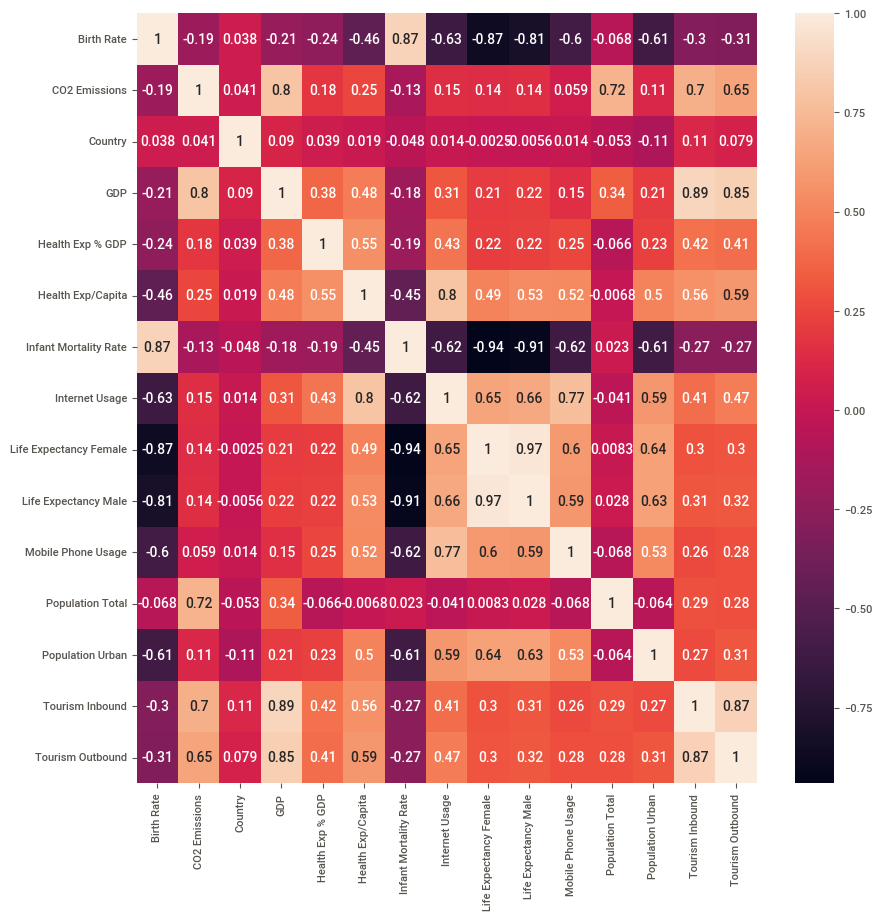

In [ ]:
# Plotting of Correlation of DataSet
plt.figure(figsize=(10,10))
sns.heatmap(data_f.corr(), annot=True)

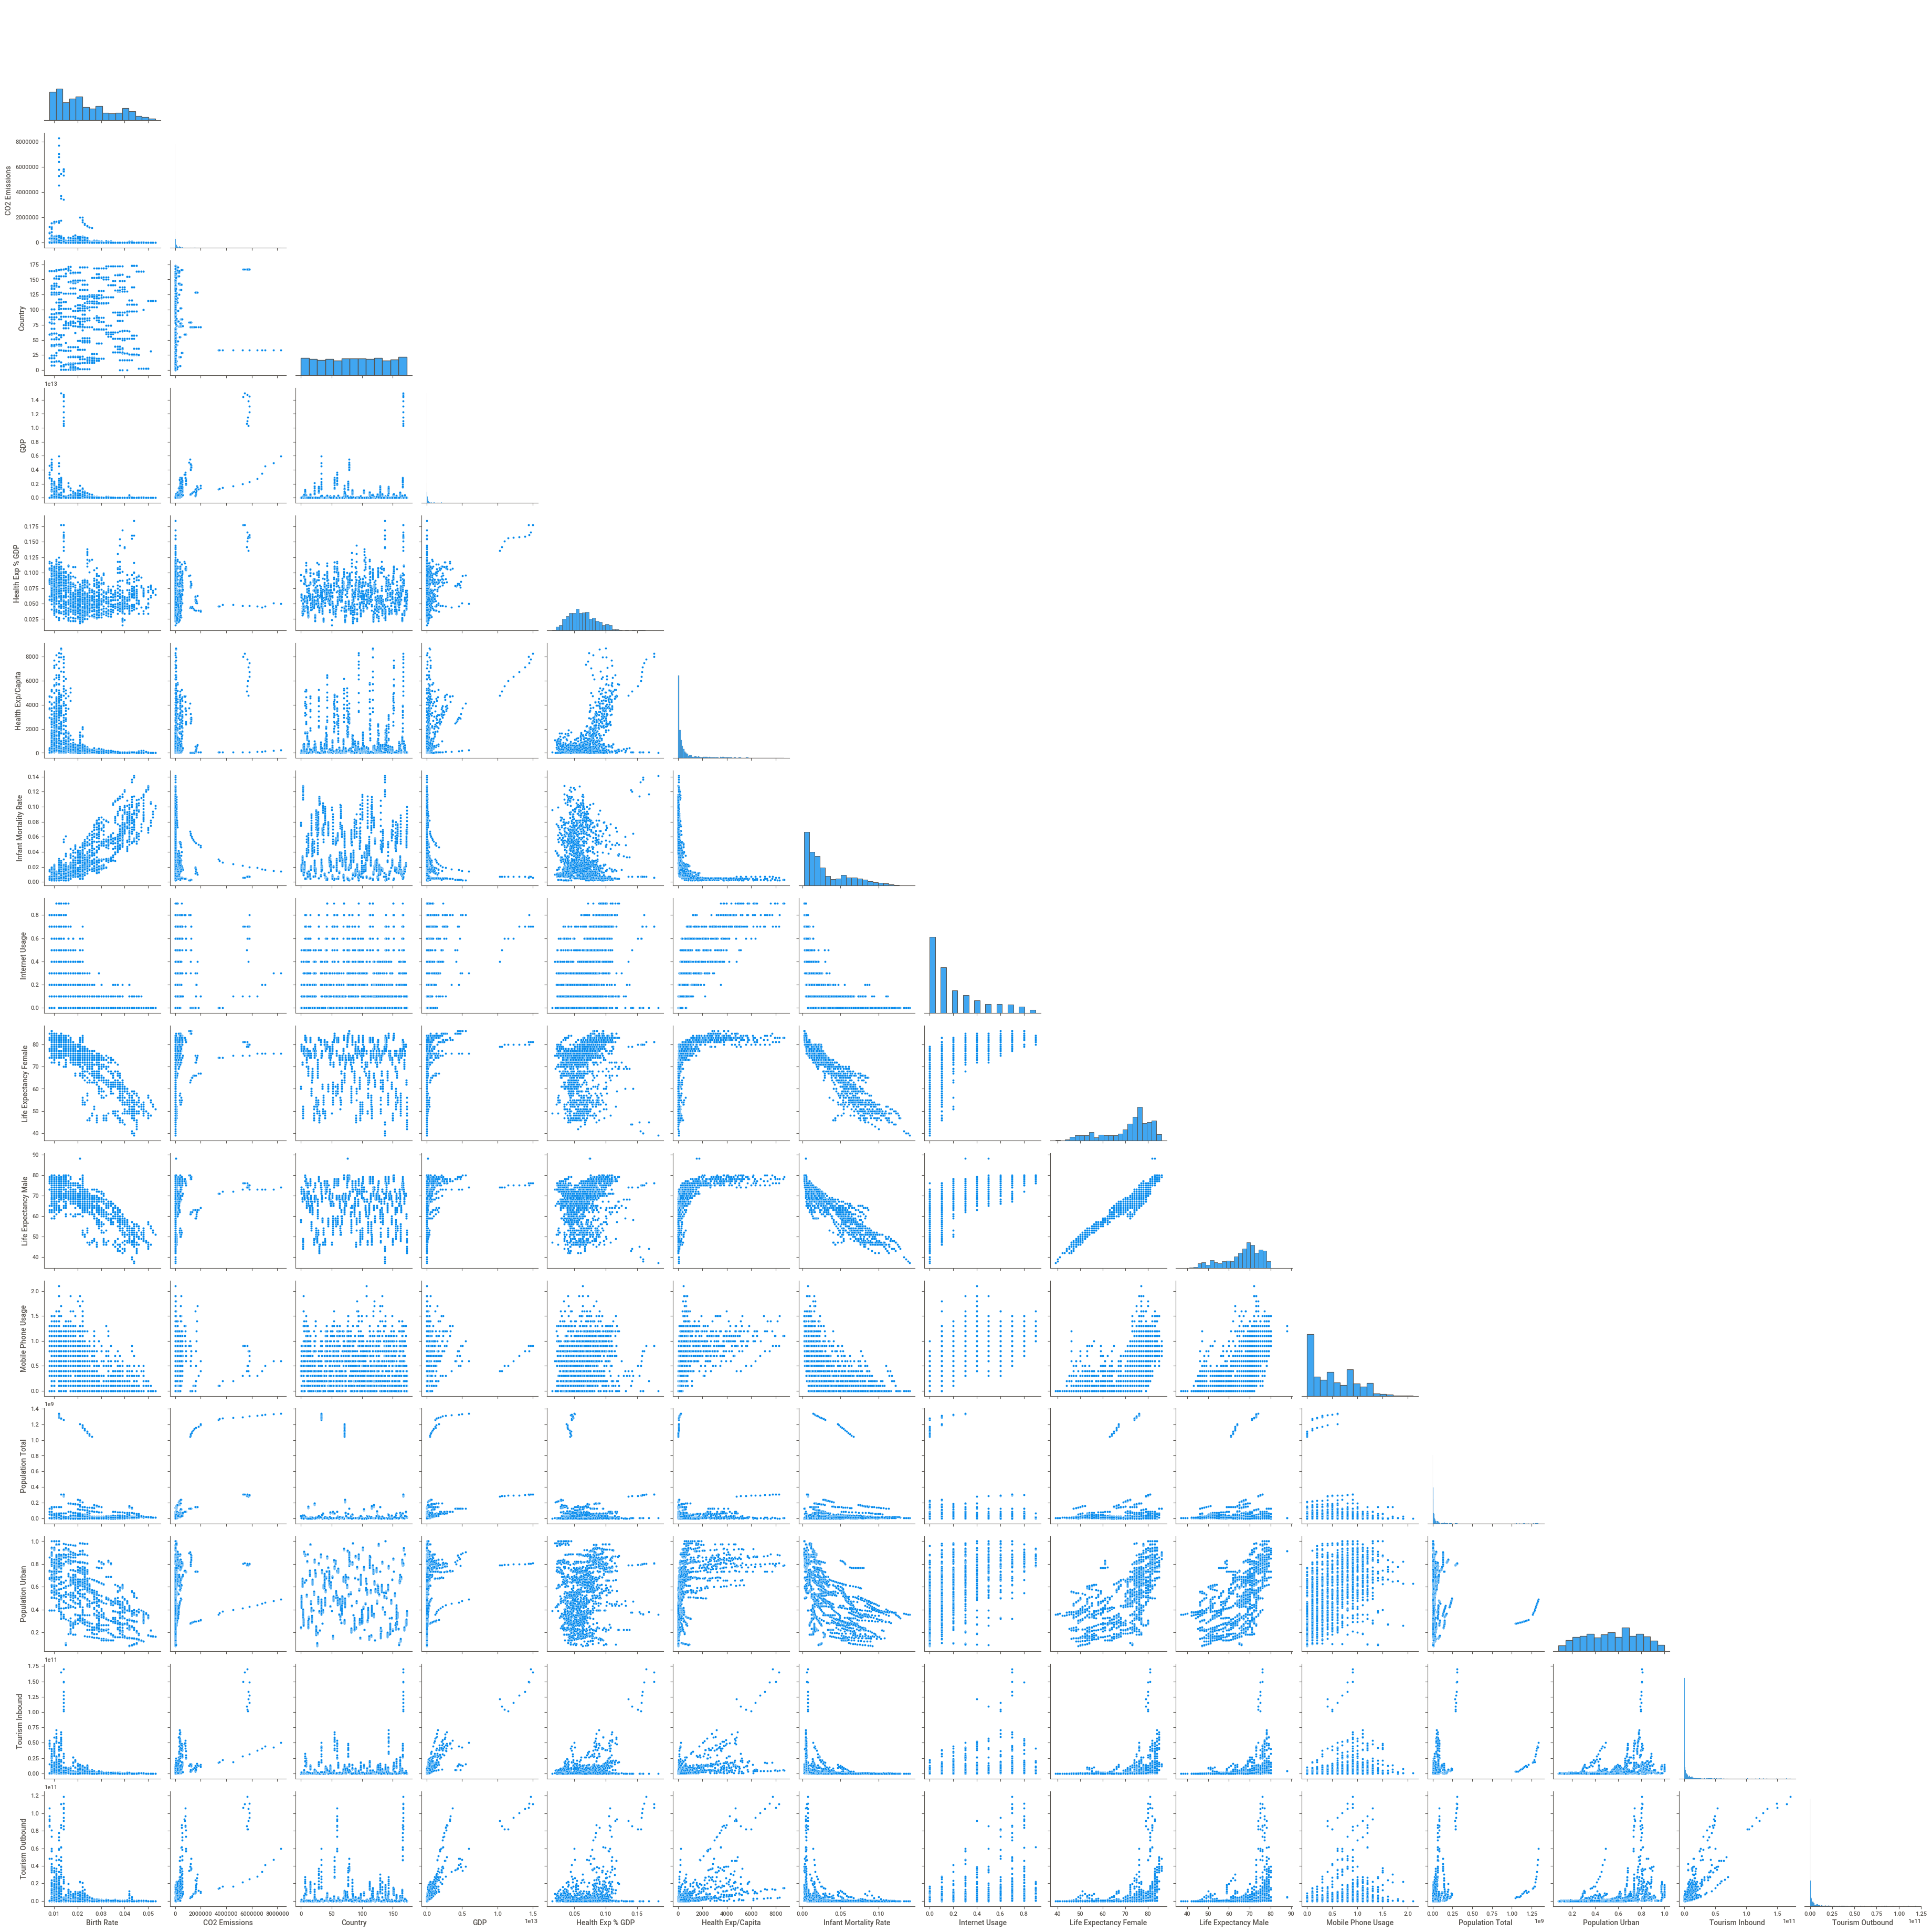

In [ ]:
sns.pairplot(data_f,corner=True)

## Outliers Detection

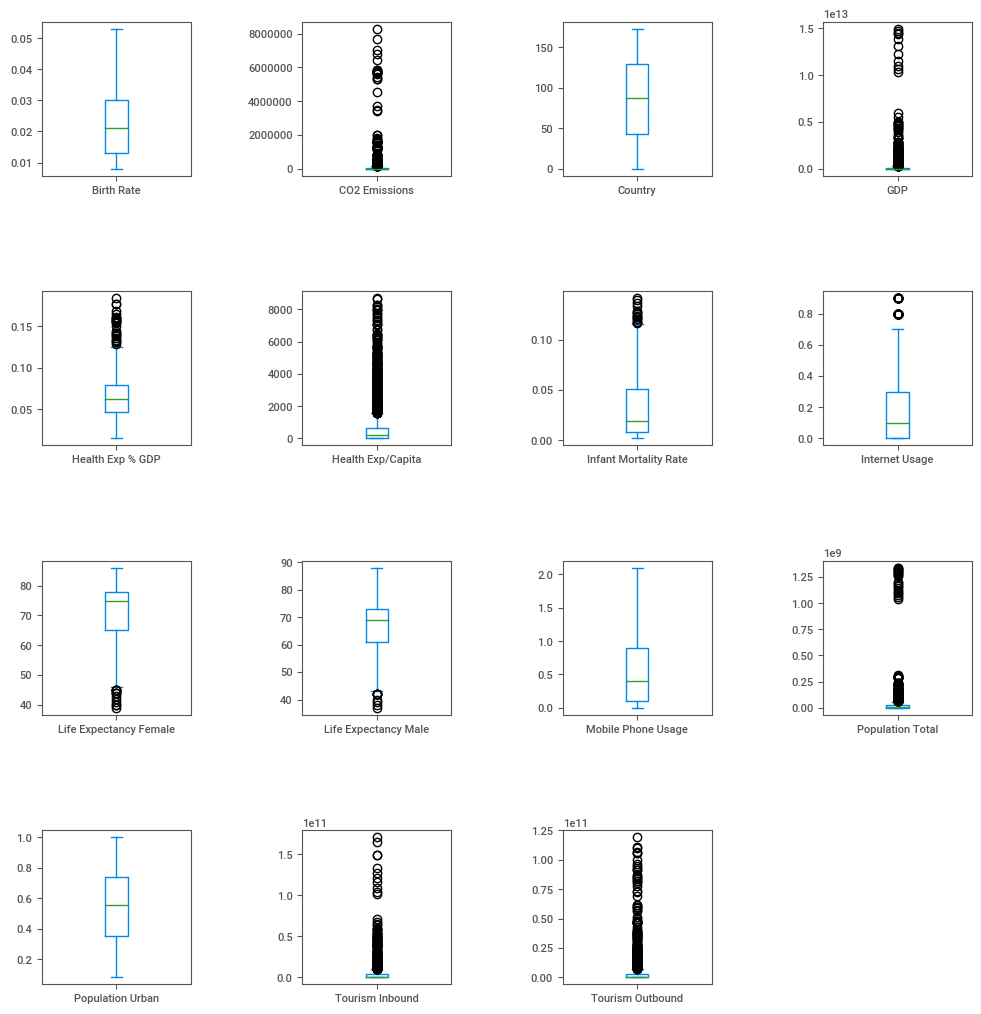

In [ ]:
data_f.plot(kind='box',layout=(7,4), subplots=True,sharey=False,figsize=(12,23))
plt.subplots_adjust(hspace=0.75, wspace=0.75)

#### As we lose over 50% of data if we remove outliers, we are proceding without removing them.

To Understand the features. trying to make clusters without scaling the data.

In [ ]:
#here I am going to work through 2 uncorrelated column to understand the data in 2d
correlation = data_f['GDP'].corr(data_f['Country'])
print(f"Correlation between GDP and Country column is': {correlation}")

Correlation between GDP and Country column is': 0.09046742110568062


In [ ]:
#df of gdp and country

df_gdp_country=data_f[['GDP','Country']]
df_gdp_country.head()

GDP  Country
0  5.479006e+10        2
1  5.474472e+10        2
2  5.676029e+10        2
3  6.786383e+10        2
4  8.532500e+10        2

##CLUSTERING for Raw Data

####Hierarchical Clustering


In [ ]:
# Define the parameter grid
param_grid = {'n_clusters': [2, 3, 4, 5, 8], 'linkage': [ 'ward', 'complete', 'average']}

best_score = -1
best_params = None

# Iterate over parameter combinations
for n_clusters in param_grid['n_clusters']:
    for linkage in param_grid['linkage']:
            # Create the hierarchical clustering model
            cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

            # Fit the model and predict clusters
            labels = cluster_model.fit_predict(df_gdp_country)

            # Evaluate the quality of clusters
            score = silhouette_score(df_gdp_country, labels)

            # Update best parameters if the current combination is better
            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'linkage': linkage}

# Best parameters
print("Best Parameters:", best_params)

Best Parameters: {'n_clusters': 2, 'linkage': 'ward'}


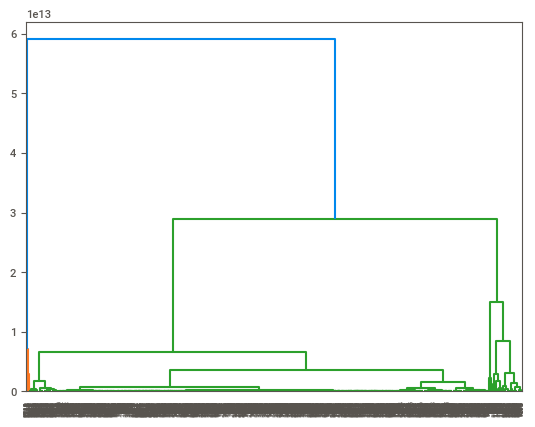

In [ ]:
# Dendogram is Plotted

dendo=sch.dendrogram(sch.linkage(df_gdp_country, method='ward'))

In [ ]:
# Set a global random seed
np.random.seed(10)

Model = AgglomerativeClustering(n_clusters=5, linkage="complete")
pred = Model.fit_predict(df_gdp_country)


In [ ]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
df_gdp_country["Clusters"] = pred

In [ ]:
df_gdp_country.head()

GDP  Country  Clusters
0  5.479006e+10        2         1
1  5.474472e+10        2         1
2  5.676029e+10        2         1
3  6.786383e+10        2         1
4  8.532500e+10        2         1

In [ ]:
cluster_0 = df_gdp_country[df_gdp_country["Clusters"]==0]
cluster_1 = df_gdp_country[df_gdp_country["Clusters"]==1]
cluster_2 = df_gdp_country[df_gdp_country["Clusters"]==2]
cluster_3 = df_gdp_country[df_gdp_country["Clusters"]==3]
cluster_4 = df_gdp_country[df_gdp_country["Clusters"]==4]

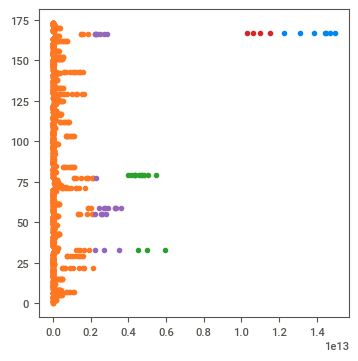

In [ ]:
plt.figure(figsize=(4,4))

plt.scatter(cluster_0['GDP'], cluster_0['Country'], label='Cluster 0')
plt.scatter(cluster_1['GDP'], cluster_1['Country'], label='Cluster 1')
plt.scatter(cluster_2['GDP'], cluster_2['Country'], label='Cluster 2')
plt.scatter(cluster_3['GDP'], cluster_3['Country'], label='Cluster 3')
plt.scatter(cluster_4['GDP'], cluster_4['Country'], label='Cluster 4')

In [ ]:
h1 = silhouette_score(df_gdp_country, pred)
print('Silhouette Score :',h1)

Silhouette Score : 0.8868999820398442


In [ ]:
score_raw_data= pd.DataFrame(columns=['Model Name','Silhouette Score','Data Distribution'])
score_raw_data

Empty DataFrame
Columns: [Model Name, Silhouette Score, Data Distribution]
Index: []

In [ ]:
new_data = {'Model Name': 'Hierarchical Clustering ', 'Silhouette Score': '0.88689','Data Distribution':'Unequal'}
score_raw_data= score_raw_data.append(new_data, ignore_index=True)
score_raw_data

Model Name Silhouette Score Data Distribution
0  Hierarchical Clustering           0.88689           Unequal

###K-Means Clustering

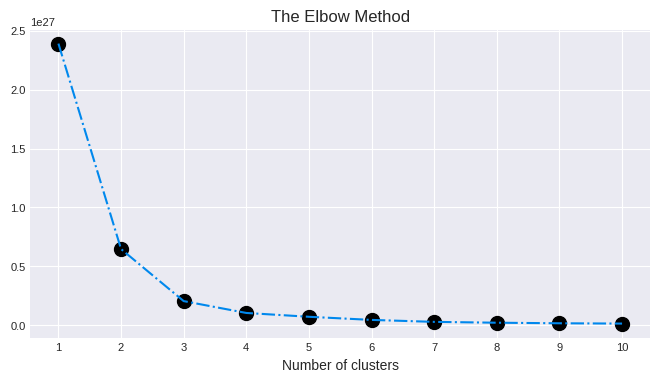

In [ ]:
#for kmeans clustering ,finding best hyperparameter
k=[]

for i in range(1,11):
  model=KMeans(n_clusters=i ,init = 'k-means++', random_state = 10)
  model.fit(df_gdp_country)
  k.append(model.inertia_)

k

plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(range(1,11),k,s=100,color='black')
plt.plot(range(1,11),k,linestyle='-.')
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show();


In [ ]:
kmeans=KMeans(n_clusters=3,random_state=10)
y_kmeans=kmeans.fit_predict(df_gdp_country)

#The cluster labels are in 'y_kmeans'
print("Cluster Labels:", y_kmeans)
print('\n')
print('Cluster Centers',kmeans.cluster_centers_)


print('\n')
#Count the number of data points in each cluster
unique_labels,counts=np.unique(y_kmeans,return_counts=True)

#Display the count of each cluster
for label,count in zip(unique_labels,counts):
  if label==0:
    print(f'Cluster {label} :- {count} data points')
  elif label==1:
    print(f'Cluster {label} :- {count} data points')
  else:
    print(f'Cluster {label} :- {count} data points')

Cluster Labels: [0 0 0 ... 0 0 0]


Cluster Centers [[1.03884999e+11 8.67634279e+01 1.00000000e+00]
 [2.58431654e+12 7.90400000e+01 2.14666667e+00]
 [1.28376818e+13 1.67000000e+02 1.09090909e+00]]


Cluster 0 :- 1657 data points
Cluster 1 :- 75 data points
Cluster 2 :- 11 data points


In [ ]:
k1 = silhouette_score(df_gdp_country, y_kmeans)
print('Silhouette Score for K-Means clustring :',k1)

Silhouette Score for K-Means clustring : 0.9055793451041542


In [ ]:
new_data = {'Model Name': 'kmeans Clustering', 'Silhouette Score': '0.90557',
              'Data Distribution':'Unequal'}
score_raw_data = score_raw_data.append(new_data, ignore_index=True)
score_raw_data

Model Name Silhouette Score Data Distribution
0  Hierarchical Clustering           0.88689           Unequal
1         kmeans Clustering          0.90557           Unequal

###DBSCAN Clustering

In [ ]:
# DBSCAN clustering
# Set a global random seed for reproducibility

np.random.seed(10)

dbscan = DBSCAN(eps=1, min_samples=10)
labels = dbscan.fit_predict(df_gdp_country)

# The cluster labels are in 'labels'
print("Cluster Labels:", labels)

# Check if there is at least one non-noise cluster
if len(set(labels)) > 1:
    # Silhouette score for DBSCAN clustering
    # Exclude noise points (-1) when calculating silhouette score
    dbscan_score = silhouette_score(df_gdp_country, labels[labels != -1])
    print(f'Silhouette Score for DBSCAN Clustering: {dbscan_score}')
else:
    print("No valid clusters to calculate silhouette score.")


Cluster Labels: [-1 -1 -1 ... -1 -1 -1]
No valid clusters to calculate silhouette score.


In [ ]:
#Count the number of data points in each cluster
unique_labels,counts=np.unique(labels,return_counts=True)

#Display the count of each cluster
for label,count in zip(unique_labels,counts):
  if label==-1:
    print(f'Outliers:- {count} data points')
  else:
    print(f'Cluster {label} :- {count} data points')

Outliers:- 1743 data points


In [ ]:
new_data = {'Model Name': 'DBSACN Clustering', 'Silhouette Score': '-',
              'Data Distribution':'all are Noise'}
score_raw_data = score_raw_data.append(new_data, ignore_index=True)
score_raw_data

Model Name Silhouette Score Data Distribution
0  Hierarchical Clustering           0.88689           Unequal
1         kmeans Clustering          0.90557           Unequal
2         DBSACN Clustering                -     all are Noise

## Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
#Scaling data
scaled_data = RobustScaler().fit_transform(data_f)

In [ ]:
scaled_data

array([[-0.05882353,  1.09873672, -0.98837209, ...,  0.11488251,
        -0.16339439, -0.096184  ],
       [-0.11764706,  1.04585035, -0.98837209, ...,  0.13577023,
        -0.16392147, -0.09583551],
       [-0.11764706,  1.14122898, -0.98837209, ...,  0.15665796,
        -0.16102253, -0.0770169 ],
       ...,
       [ 0.        ,  2.53619038,  0.96511628, ...,  0.86684073,
         0.09882725,  0.74054713],
       [ 0.        ,  2.51480615,  0.96511628, ...,  0.86684073,
         0.0877586 ,  0.62937794],
       [ 0.        ,  2.75330358,  0.96511628, ...,  0.8694517 ,
         0.01897483,  0.61648371]])

In [ ]:
scaled_data.shape

(1743, 15)

#### Note :
 > We are proceding to build the model with Robust scaled data as Robust scaling is less affected by extreme values and can provide a more stable scaling in the presence of outliers.

## Principal component analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca= PCA()

In [ ]:
pca_scaled = pca.fit_transform(scaled_data)

In [ ]:
pca_scaled

array([[-2.79053762,  1.2422164 , -1.10756752, ..., -0.13621337,
         0.04240304,  0.07521999],
       [-2.81697696,  1.22638858, -1.05223818, ..., -0.13683194,
         0.0610771 ,  0.14024584],
       [-2.73381169,  1.26102171, -1.07391575, ..., -0.13368335,
         0.04183301,  0.14128561],
       ...,
       [-0.2216022 ,  0.04729408, -0.84378404, ...,  0.20116005,
         0.03257064, -0.04862862],
       [-0.18967748,  0.02113088, -0.87273913, ...,  0.20754091,
         0.03120176, -0.04850166],
       [ 0.2666381 , -0.10266478, -1.03071227, ..., -0.03229111,
        -0.00415031, -0.05496635]])

In [ ]:
pca.explained_variance_ratio_

array([7.65146007e-01, 1.56285338e-01, 3.16423276e-02, 1.88247567e-02,
       1.12661654e-02, 6.80523970e-03, 5.04977822e-03, 1.37262692e-03,
       1.31047139e-03, 8.88755515e-04, 6.37328468e-04, 3.43186564e-04,
       2.67739808e-04, 1.17508119e-04, 4.27703720e-05])

In [ ]:
cvar= np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
cvar

array([76.51, 92.14, 95.3 , 97.18, 98.31, 98.99, 99.49, 99.63, 99.76,
       99.85, 99.91, 99.94, 99.97, 99.98, 99.98])

Text(0, 0.5, 'Cummulative Varience % ')

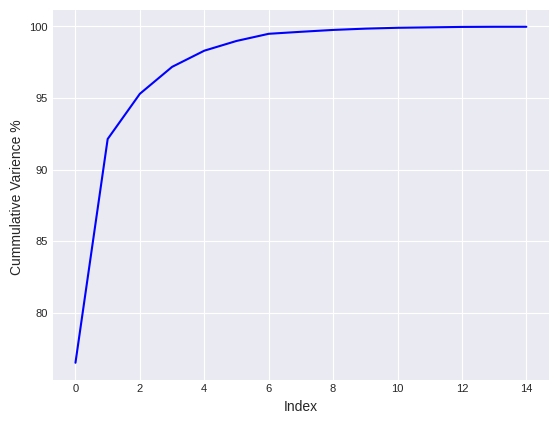

In [ ]:
plt.plot(cvar,color = 'blue')
plt.xlabel('Index')
plt.ylabel('Cummulative Varience % ')

In [ ]:
data_pca = pca_scaled[:,:3]
print(data_pca.shape)
print(data_pca)

(1743, 3)
[[-2.79053762  1.2422164  -1.10756752]
 [-2.81697696  1.22638858 -1.05223818]
 [-2.73381169  1.26102171 -1.07391575]
 ...
 [-0.2216022   0.04729408 -0.84378404]
 [-0.18967748  0.02113088 -0.87273913]
 [ 0.2666381  -0.10266478 -1.03071227]]


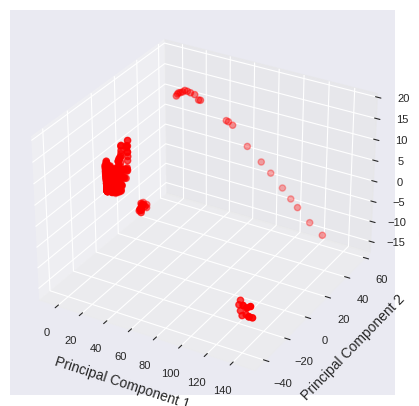

In [ ]:
#Plotting first 3 features obtained by PCA

fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data_pca[:,0],data_pca[:,1],data_pca[:,2],c='red',marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

## CLUSTERING with outliers data

##DBSCAN(Density-Based Spatial Clustering of Applications with Noise) CLUSTERING

In [ ]:
#DBSCAN Model
# Set a global random seed for reproducibility
np.random.seed(10)

dbscan=DBSCAN(eps=0.5,min_samples=5)
labels=dbscan.fit_predict(data_pca)

#The cluster labels are in 'labels'
print("Cluster Labels:", labels)

#Silhoutte score for dbscan clustering

dbscan_score=silhouette_score(data_pca,labels)
print(f'Silhouette Score for DBSCAN Clustering :- {dbscan_score}')

Cluster Labels: [ 0  0  0 ... -1 -1 -1]
Silhouette Score for DBSCAN Clustering :- 0.2016944738043127


In [ ]:
#Count the number of data points in each cluster
unique_labels,counts=np.unique(labels,return_counts=True)

#Display the count of each cluster
for label,count in zip(unique_labels,counts):
  if label==-1:
    print(f'Outliers:- {count} data points')
  else:
    print(f'Cluster {label} :- {count} data points')

Outliers:- 306 data points
Cluster 0 :- 1324 data points
Cluster 1 :- 17 data points
Cluster 2 :- 6 data points
Cluster 3 :- 12 data points
Cluster 4 :- 5 data points
Cluster 5 :- 11 data points
Cluster 6 :- 5 data points
Cluster 7 :- 5 data points
Cluster 8 :- 16 data points
Cluster 9 :- 10 data points
Cluster 10 :- 5 data points
Cluster 11 :- 7 data points
Cluster 12 :- 4 data points
Cluster 13 :- 5 data points
Cluster 14 :- 5 data points


In [ ]:
score_with_outlier_data = pd.DataFrame(columns=['Model Name','Silhouette Score', 'Data Distribution'])
score_with_outlier_data


Empty DataFrame
Columns: [Model Name, Silhouette Score, Data Distribution]
Index: []

In [ ]:
new_data = {'Model Name': 'PCA', 'Silhouette Score': '',
              'Data Distribution':''}
score_with_outlier_data = score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0        PCA

In [ ]:
new_data = {'Model Name': 'DBSACN Clustering', 'Silhouette Score': '0.20169',
              'Data Distribution':'Most are Noise'}
score_with_outlier_data = score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                PCA                                   
1  DBSACN Clustering          0.20169    Most are Noise

####Hyperparameter tuning for DBSCAN Clustering

In [ ]:
#DBSCAN Model
# Set a global random seed for reproducibility
np.random.seed(10)
dbscan=DBSCAN(eps=1,min_samples=10)
labels=dbscan.fit_predict(data_pca)

#The cluster labels are in 'labels'
print("Cluster Labels:", labels)

#Silhoutte score for dbscan clustering

dbscan_score=silhouette_score(data_pca,labels)
print(f'Silhouette Score for DBSCAN Clustering :- {dbscan_score}')


#Count the number of data points in each cluster
unique_labels,counts=np.unique(labels,return_counts=True)

print('\nData Distribution:')
#Display the count of each cluster
for label,count in zip(unique_labels,counts):
  if label==-1:
    print(f'Outliers:- {count} data points')
  else:
    print(f'Cluster {label} :- {count} data points')

Cluster Labels: [ 0  0  0 ...  0  0 -1]
Silhouette Score for DBSCAN Clustering :- 0.4765839992925748

Data Distribution:
Outliers:- 243 data points
Cluster 0 :- 1471 data points
Cluster 1 :- 29 data points


In [ ]:
new_data = {'Model Name': 'DBSACN Clustering', 'Silhouette Score': '0.47658',
              'Data Distribution':'Most are Noise'}
score_with_outlier_data = score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                PCA                                   
1  DBSACN Clustering          0.20169    Most are Noise
2  DBSACN Clustering          0.47658    Most are Noise

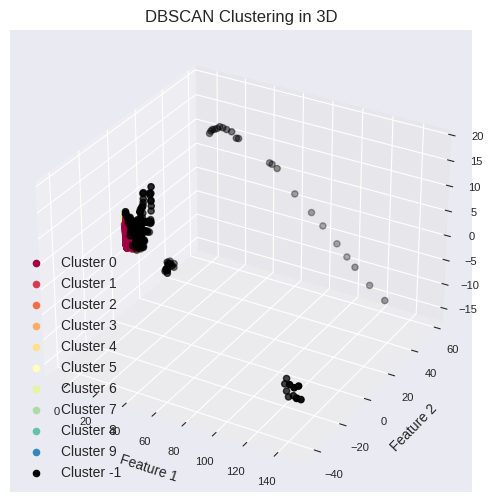

In [ ]:
#Plotting with anothet hyperparameters
# Apply DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca)

# Plot the clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

unique_labels = set(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points are plotted in black
        color = 'black'

    cluster_points = data_pca[dbscan_labels == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=color, label=f'Cluster {label}')

ax.set_title('DBSCAN Clustering in 3D')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.show()


Inference:-<br>
* DBSCAN clustering is not working good for this dataset

###K-Means Clustering

In [ ]:
#k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=10)
labels = kmeans.fit_predict(data_pca)

# The cluster labels are in 'labels'
print("Cluster Labels:", labels)
print('\nCluster Centers:', kmeans.cluster_centers_)
print()

# Silhouette score for k-means clustering
kmeans_score = silhouette_score(data_pca, labels)
print(f'Silhouette Score for K-means Clustering: {kmeans_score}')

# Display the counts of each unique label
unique_labels, counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} samples")


Cluster Labels: [0 0 0 ... 0 0 0]

Cluster Centers: [[-2.66884661e+00  5.75234686e-03 -2.96417079e-01]
 [ 2.30389716e+01 -7.87873570e-01  6.88060971e+00]
 [ 1.20084315e+02  3.63731465e+00 -9.47211572e+00]]

Silhouette Score for K-means Clustering: 0.8436930528830751
Cluster 0: 1630 samples
Cluster 1: 95 samples
Cluster 2: 18 samples


In [ ]:
new_data = {'Model Name': 'KMeans Clustering(k=3)', 'Silhouette Score': '0.84369',
              'Data Distribution':'Unequal'}
score_with_outlier_data= score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                     PCA                                   
1       DBSACN Clustering          0.20169    Most are Noise
2       DBSACN Clustering          0.47658    Most are Noise
3  KMeans Clustering(k=3)          0.84369           Unequal

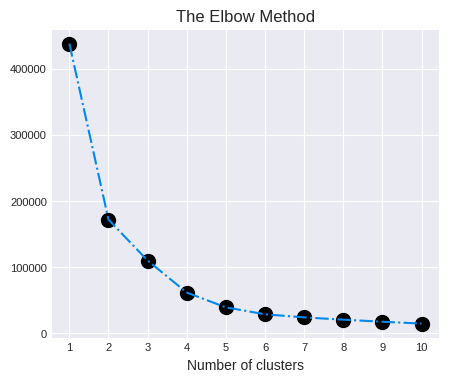

In [ ]:
# Elbow Method for KMeans Clustering

k=[]

for i in range(1,11):
  model=KMeans(n_clusters=i ,init = 'k-means++', random_state = 10)
  model.fit(data_pca)
  k.append(model.inertia_)
k

plt.figure(figsize=(5,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(range(1,11),k,s=100,color='black')
plt.plot(range(1,11),k,linestyle='-.')
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show();


**Elbow Method** : In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

---


> By Elbow Method for Kmeans clustering we got that there shold be 3,4 clusters.

In [ ]:
kl=KneeLocator(range(1,11),k,direction='decreasing',curve='convex')
kl.elbow

4

In [ ]:
#k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=10)
y_kmeans = kmeans.fit_predict(data_pca)

# The cluster labels are in 'y_kmeans'
print("Cluster Labels:", y_kmeans)
print('\nCluster Centers:', kmeans.cluster_centers_)
print()

# Silhouette score for k-means clustering
kmeans_score = silhouette_score(data_pca, y_kmeans)
print(f'Silhouette Score for K-means Clustering: {kmeans_score}')
print('\n')

# Count the number of data points in each cluster
unique_labels, counts = np.unique(y_kmeans, return_counts=True)

# Display the count of each cluster
for label, count in zip(unique_labels, counts):
    print(f'Cluster {label} : {count} data points')


Cluster Labels: [2 2 2 ... 2 2 2]

Cluster Centers: [[ 1.97389992e+01 -8.83584457e+00  5.67877986e+00]
 [ 1.33260602e+02 -2.94013450e+01 -1.10633466e+01]
 [-2.69507231e+00  4.74310044e-02 -3.23014241e-01]
 [ 5.61732255e+01  4.53357364e+01  7.44993937e+00]]

Silhouette Score for K-means Clustering: 0.8325835731834345


Cluster 0 : 85 data points
Cluster 1 : 11 data points
Cluster 2 : 1625 data points
Cluster 3 : 22 data points


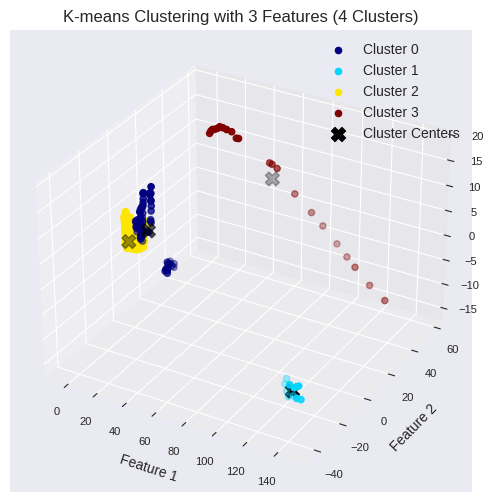

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for label in range(4):
    cluster_points = data_pca[y_kmeans == label]
    color = plt.cm.jet(label / 3)
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=color, label=f'Cluster {label}')

# Plotting cluster centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', marker='X', s=100, label='Cluster Centers')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('K-means Clustering with 3 Features (4 Clusters)')
ax.legend()

plt.show()

In [ ]:
new_data = {'Model Name': 'KMeans Clustering(k=4)', 'Silhouette Score': '0.83258',
              'Data Distribution':'Unequal'}
score_with_outlier_data = score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                     PCA                                   
1       DBSACN Clustering          0.20169    Most are Noise
2       DBSACN Clustering          0.47658    Most are Noise
3  KMeans Clustering(k=3)          0.84369           Unequal
4  KMeans Clustering(k=4)          0.83258           Unequal

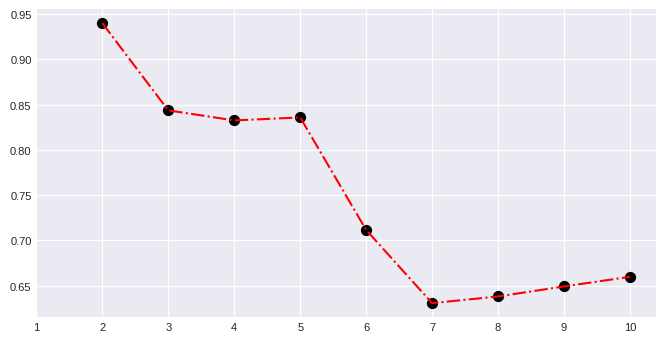

0.9400289479280941 for 2 clusters


[0.9400289479280941,
 0.8436930528830751,
 0.8325835731834345,
 0.8358664123892778,
 0.7116190184667139,
 0.6307741901122395,
 0.6381318007571369,
 0.649215478628057,
 0.6598804023287949]

In [ ]:
#Silhotte Score for KMean clustering technique with different hyperparameters

nc=range(2,11)
l=[]
for i in nc:
  model=KMeans(n_clusters=i)
  #model.fit_predict(scaled_fearures)
  l.append(silhouette_score(data_pca,model.fit_predict(data_pca)))



#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();

# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

###Hierarchical Clustering

In [ ]:
# Define the parameter grid for hierarchical clustering
# Set a global random seed
np.random.seed(10)

param_grid = {'n_clusters': [2, 3, 4, 5, 8,10], 'linkage': [ 'ward', 'complete', 'average']}
best_score = -1
best_params = None

# Iterate over parameter combinations
for n_clusters in param_grid['n_clusters']:
    for linkage in param_grid['linkage']:
            # Create the hierarchical clustering model
            cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

            # Fit the model and predict clusters
            labels = cluster_model.fit_predict(data_pca)

            # Evaluate the quality of clusters
            score = silhouette_score(data_pca, labels)

            # Update best parameters if the current combination is better
            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'linkage': linkage}

# Best parameters
print("Best Parameters:", best_params)


Best Parameters: {'n_clusters': 2, 'linkage': 'complete'}


In [ ]:
# Set a global random seed
np.random.seed(10)

Model = AgglomerativeClustering(n_clusters=2, linkage="complete")
pred = Model.fit_predict(data_pca)

#silhouette_score
h = silhouette_score(data_pca, pred)
print('Silhouette Score :',h)

Silhouette Score : 0.9433463968959884


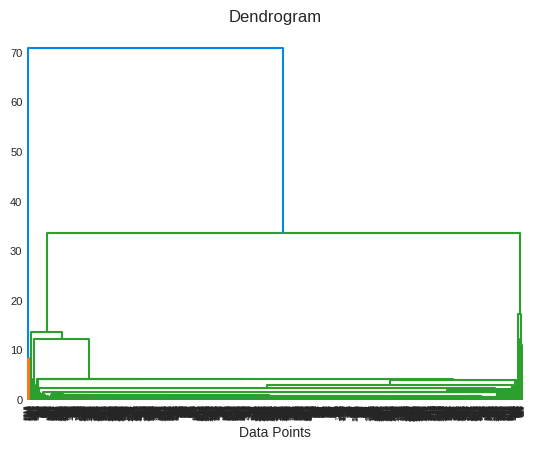

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(data_pca))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.show()

In [ ]:
new_data = {'Model Name': 'Hierarchical Clustering', 'Silhouette Score': '0.94334',
              'Data Distribution':'Unequal'}
score_with_outlier_data= score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                      PCA                                   
1        DBSACN Clustering          0.20169    Most are Noise
2        DBSACN Clustering          0.47658    Most are Noise
3   KMeans Clustering(k=3)          0.84369           Unequal
4   KMeans Clustering(k=4)          0.83258           Unequal
5  Hierarchical Clustering          0.94334           Unequal

##TSNE ( t-distributed stochastic neighbor embedding)

In [ ]:
data_tsne = TSNE(n_components=2).fit_transform(scaled_data)
data_tsne

array([[ 5.7647753, 16.39514  ],
       [ 5.7547903, 16.27216  ],
       [ 5.831694 , 16.340498 ],
       ...,
       [17.691204 , 12.847337 ],
       [17.723051 , 12.807532 ],
       [17.910677 , 12.661397 ]], dtype=float32)

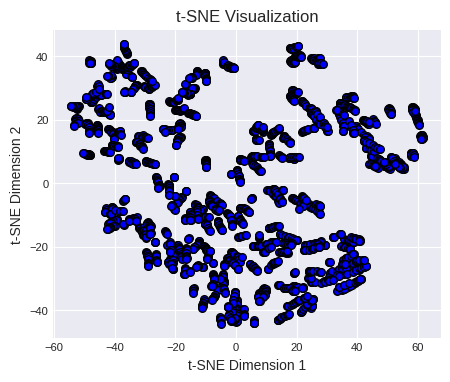

In [ ]:
# Assuming data_tsne is the result from your t-SNE code
plt.figure(figsize=(5,4))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1] ,c='b', marker='o', s=30, edgecolors='k')

plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


###KMeans Clustering

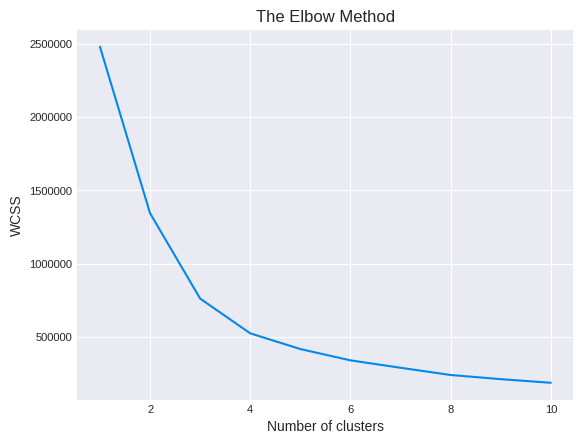

In [ ]:
#finding best hyperparameter for kmeans wit tsne_data
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
    kmeans.fit(data_tsne)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Building the Cluster

k_cluster=KMeans(3,random_state=10)
k_cluster.fit(data_tsne)
y_kmeans = kmeans.fit_predict(data_tsne)

s1_kmeans = silhouette_score(data_tsne,y_kmeans)
print('Silhouette Score for K-Means clustring :',s1_kmeans)

Silhouette Score for K-Means clustring : 0.42291275


In [ ]:
# Printing k_cluster.labels_

k_cluster.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

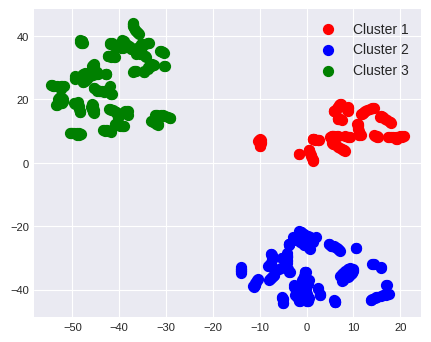

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(data_tsne[y_kmeans == 0, 0], data_tsne[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(data_tsne[y_kmeans == 1, 0], data_tsne[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(data_tsne[y_kmeans == 2, 0], data_tsne[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.legend()


In [ ]:
new_data = {'Model Name': 't-SNE', 'Silhouette Score': '',
              'Data Distribution':''}
score_with_outlier_data = score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                      PCA                                   
1        DBSACN Clustering          0.20169    Most are Noise
2        DBSACN Clustering          0.47658    Most are Noise
3   KMeans Clustering(k=3)          0.84369           Unequal
4   KMeans Clustering(k=4)          0.83258           Unequal
5  Hierarchical Clustering          0.94334           Unequal
6                    t-SNE

In [ ]:
new_data = {'Model Name': 'KMeans Clustering(k=3)', 'Silhouette Score': '0.42291',
              'Data Distribution':'Equal'}
score_with_outlier_data = score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                      PCA                                   
1        DBSACN Clustering          0.20169    Most are Noise
2        DBSACN Clustering          0.47658    Most are Noise
3   KMeans Clustering(k=3)          0.84369           Unequal
4   KMeans Clustering(k=4)          0.83258           Unequal
5  Hierarchical Clustering          0.94334           Unequal
6                    t-SNE                                   
7   KMeans Clustering(k=3)          0.42291             Equal

In [ ]:
#k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=10)
y_kmeans = kmeans.fit_predict(data_tsne)

# The cluster labels are in 'y_kmeans'
print("Cluster Labels:", y_kmeans)
print('\nCluster Centers:', kmeans.cluster_centers_)
print()

# Silhouette score for k-means clustering
kmeans_score = silhouette_score(data_tsne, y_kmeans)
print(f'Silhouette Score for K-means Clustering: {kmeans_score}')
print('\n')

# Count the number of data points in each cluster
unique_labels, counts = np.unique(y_kmeans, return_counts=True)

# Display the count of each cluster
for label, count in zip(unique_labels, counts):
    print(f'Cluster {label} : {count} data points')


Cluster Labels: [3 3 3 ... 3 3 3]

Cluster Centers: [[-32.46497   24.172897]
 [ 22.445736 -24.13332 ]
 [-14.195159 -17.129604]
 [ 32.203003  18.708658]]

Silhouette Score for K-means Clustering: 0.4574791193008423


Cluster 0 : 425 data points
Cluster 1 : 405 data points
Cluster 2 : 499 data points
Cluster 3 : 414 data points


In [ ]:
new_data = {'Model Name': 'KMeans Clustering(k=4)', 'Silhouette Score': '0.45747',
              'Data Distribution':'Equal'}
score_with_outlier_data = score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                      PCA                                   
1        DBSACN Clustering          0.20169    Most are Noise
2        DBSACN Clustering          0.47658    Most are Noise
3   KMeans Clustering(k=3)          0.84369           Unequal
4   KMeans Clustering(k=4)          0.83258           Unequal
5  Hierarchical Clustering          0.94334           Unequal
6                    t-SNE                                   
7   KMeans Clustering(k=3)          0.42291             Equal
8   KMeans Clustering(k=4)          0.45747             Equal

In [ ]:
#k-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=10)
y_kmeans = kmeans.fit_predict(data_tsne)

# The cluster labels are in 'y_kmeans'
print("Cluster Labels:", y_kmeans)
print('\nCluster Centers:', kmeans.cluster_centers_)
print()

# Silhouette score for k-means clustering
kmeans_score = silhouette_score(data_tsne, y_kmeans)
print(f'Silhouette Score for K-means Clustering: {kmeans_score}')
print('\n')

# Count the number of data points in each cluster
unique_labels, counts = np.unique(y_kmeans, return_counts=True)

# Display the count of each cluster
for label, count in zip(unique_labels, counts):
    print(f'Cluster {label} : {count} data points')


Cluster Labels: [4 4 4 ... 4 4 4]

Cluster Centers: [[-15.681349  -16.851648 ]
 [ 47.062702   15.6792555]
 [-33.70992    23.63342  ]
 [ 21.37634   -25.923794 ]
 [ 14.692586   19.832066 ]]

Silhouette Score for K-means Clustering: 0.45203331112861633


Cluster 0 : 454 data points
Cluster 1 : 205 data points
Cluster 2 : 408 data points
Cluster 3 : 413 data points
Cluster 4 : 263 data points


In [ ]:
new_data = {'Model Name': 'KMeans Clustering(k=5)', 'Silhouette Score': '0.45203',
              'Data Distribution':'Equal'}
score_with_outlier_data = score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                      PCA                                   
1        DBSACN Clustering          0.20169    Most are Noise
2        DBSACN Clustering          0.47658    Most are Noise
3   KMeans Clustering(k=3)          0.84369           Unequal
4   KMeans Clustering(k=4)          0.83258           Unequal
5  Hierarchical Clustering          0.94334           Unequal
6                    t-SNE                                   
7   KMeans Clustering(k=3)          0.42291             Equal
8   KMeans Clustering(k=4)          0.45747             Equal
9   KMeans Clustering(k=5)          0.45203             Equal

###Hierarchical Clustering

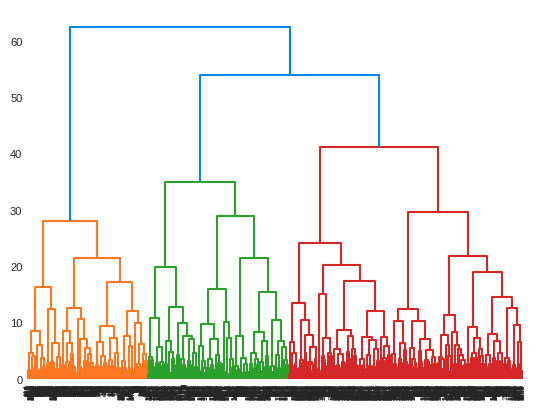

In [ ]:
# Dendogram is Plotted

dendo=sch.dendrogram(sch.linkage(data_tsne, method='average'))

In [ ]:
hc = AgglomerativeClustering(n_clusters =3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(data_tsne)

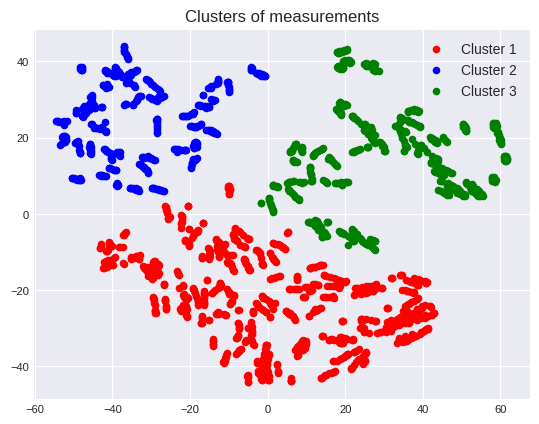

In [ ]:
plt.scatter(data_tsne[y_hc == 0, 0], data_tsne[y_hc == 0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(data_tsne[y_hc == 1, 0], data_tsne[y_hc == 1, 1], s=20, c='blue', label='Cluster 2')
plt.scatter(data_tsne[y_hc == 2, 0], data_tsne[y_hc == 2, 1], s=20, c='green', label='Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()


In [ ]:
s2_hierarchy = silhouette_score(data_tsne,y_hc)
print('Silhouette Score for Hierarchy clustring :',s2_hierarchy)

Silhouette Score for Hierarchy clustring : 0.43433663


In [ ]:
new_data = {'Model Name': 'Hierarchy Clustring', 'Silhouette Score': '0.43433',
              'Data Distribution':'Equal'}
score_with_outlier_data = score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                       PCA                                   
1         DBSACN Clustering          0.20169    Most are Noise
2         DBSACN Clustering          0.47658    Most are Noise
3    KMeans Clustering(k=3)          0.84369           Unequal
4    KMeans Clustering(k=4)          0.83258           Unequal
5   Hierarchical Clustering          0.94334           Unequal
6                     t-SNE                                   
7    KMeans Clustering(k=3)          0.42291             Equal
8    KMeans Clustering(k=4)          0.45747             Equal
9    KMeans Clustering(k=5)          0.45203             Equal
10      Hierarchy Clustring          0.43433             Equal

In [ ]:
# Define the parameter grid for hierarchical clustering
# Set a global random seed
np.random.seed(10)

param_grid = {'n_clusters': [2, 3, 4, 5, 8,10], 'linkage': [ 'ward', 'complete', 'average']}
best_score = -1
best_params = None

# Iterate over parameter combinations
for n_clusters in param_grid['n_clusters']:
    for linkage in param_grid['linkage']:
            # Create the hierarchical clustering model
            cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

            # Fit the model and predict clusters
            labels = cluster_model.fit_predict(data_tsne)

            # Evaluate the quality of clusters
            score = silhouette_score(data_tsne, labels)

            # Update best parameters if the current combination is better
            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'linkage': linkage}

# Best parameters
print("Best Parameters:", best_params)


Best Parameters: {'n_clusters': 3, 'linkage': 'average'}


In [ ]:
# Set a global random seed
np.random.seed(10)

Model = AgglomerativeClustering(n_clusters=3,linkage="average")
pred = Model.fit_predict(data_tsne)

#silhouette_score
h = silhouette_score(data_pca, pred)
print('Silhouette Score :',h)

Silhouette Score : -0.10686637921016727


In [ ]:
new_data = {'Model Name': 'Hierarchy Clustring', 'Silhouette Score': '-0.10686',
              'Data Distribution':'Equal'}
score_with_outlier_data = score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                       PCA                                   
1         DBSACN Clustering          0.20169    Most are Noise
2         DBSACN Clustering          0.47658    Most are Noise
3    KMeans Clustering(k=3)          0.84369           Unequal
4    KMeans Clustering(k=4)          0.83258           Unequal
5   Hierarchical Clustering          0.94334           Unequal
6                     t-SNE                                   
7    KMeans Clustering(k=3)          0.42291             Equal
8    KMeans Clustering(k=4)          0.45747             Equal
9    KMeans Clustering(k=5)          0.45203             Equal
10      Hierarchy Clustring          0.43433             Equal
11      Hierarchy Clustring         -0.10686             Equal

###DBSCAN Clustering

2.520600074109593
[[   0    2    1 ...    8    9   10]
 [   1    2    0 ...    8 1495 1493]
 [   2    0    1 ...    8 1495    9]
 ...
 [1740 1741 1742 ... 1732 1735 1734]
 [1741 1740 1742 ... 1732 1735 1734]
 [1742 1741 1740 ... 1732 1735 1734]]

 The distance of the data points which is nearest to 11th point
 [0.76761699 0.86810344 0.90744393 ... 6.54739502 6.81981389 6.84647226]


Text(0, 0.5, 'Distance')

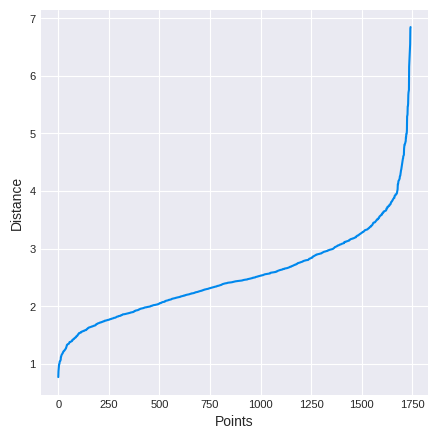

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data_tsne)

distances, indices = neighbors.kneighbors(data_tsne)

print(distances[0,10])
print(indices)

distances = np.sort(distances[:,10], axis=0)   #Here the placing data points for 11th data point distance
print("\n The distance of the data points which is nearest to 11th point\n",distances)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

3.3824641611555535


<Figure size 500x500 with 0 Axes>

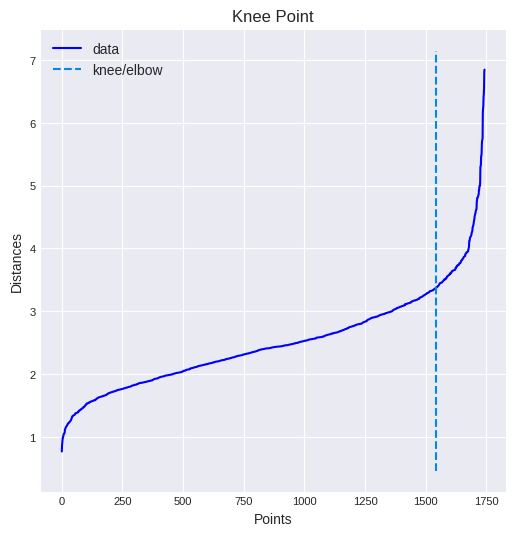

In [ ]:
#Plotting of the eps we use the knee plot using the kneed library

from kneed import KneeLocator     #importing the knee plot

i=np.arange(len(distances))    # 'i' is a variable where it contains the distance

# Implementing the knee method on distance
knee= KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distances")

print(distances[knee.knee])

In [ ]:
# Now considering the Eps and the Minpts

dbscan= DBSCAN(eps=3.4, min_samples=5)
cluster=dbscan.fit_predict(data_tsne)

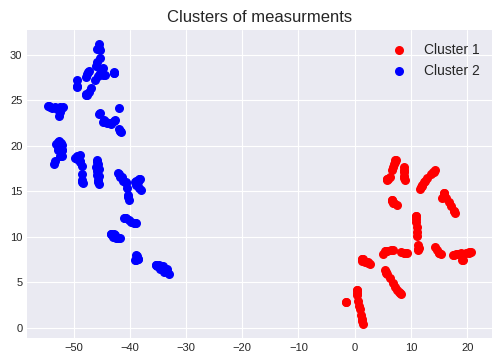

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data_tsne[cluster == 0, 0], data_tsne[cluster == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[cluster == 1, 0], data_tsne[cluster == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_tsne, cluster, metric='euclidean')

silhouette_avg

0.21914288

In [ ]:
new_data = {'Model Name': 'DBSACN Clustering', 'Silhouette Score': '0.12803',
              'Data Distribution':'Equal'}
score_with_outlier_data = score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                       PCA                                   
1         DBSACN Clustering          0.20169    Most are Noise
2         DBSACN Clustering          0.47658    Most are Noise
3    KMeans Clustering(k=3)          0.84369           Unequal
4    KMeans Clustering(k=4)          0.83258           Unequal
5   Hierarchical Clustering          0.94334           Unequal
6                     t-SNE                                   
7    KMeans Clustering(k=3)          0.42291             Equal
8    KMeans Clustering(k=4)          0.45747             Equal
9    KMeans Clustering(k=5)          0.45203             Equal
10      Hierarchy Clustring          0.43433             Equal
11      Hierarchy Clustring         -0.10686             Equal
12        DBSACN Clustering          0.12803             Equal

In [ ]:
#DBSCAN Model
# Set a global random seed for reproducibility
np.random.seed(10)

dbscan=DBSCAN(eps=3.5,min_samples=10)
labels=dbscan.fit_predict(data_tsne)

#The cluster labels are in 'labels'
print("Cluster Labels:", labels)

#Silhoutte score for dbscan clustering

dbscan_score=silhouette_score(data_tsne,labels)
print(f'Silhouette Score for DBSCAN Clustering :- {dbscan_score}')

Cluster Labels: [0 0 0 ... 0 0 0]
Silhouette Score for DBSCAN Clustering :- 0.3092304766178131


In [ ]:
#Count the number of data points in each cluster
unique_labels,counts=np.unique(labels,return_counts=True)

#Display the count of each cluster
for label,count in zip(unique_labels,counts):
  if label==-1:
    print(f'Outliers:- {count} data points')
  else:
    print(f'Cluster {label} :- {count} data points')

Outliers:- 38 data points
Cluster 0 :- 115 data points
Cluster 1 :- 125 data points
Cluster 2 :- 11 data points
Cluster 3 :- 17 data points
Cluster 4 :- 24 data points
Cluster 5 :- 66 data points
Cluster 6 :- 22 data points
Cluster 7 :- 74 data points
Cluster 8 :- 98 data points
Cluster 9 :- 78 data points
Cluster 10 :- 25 data points
Cluster 11 :- 91 data points
Cluster 12 :- 11 data points
Cluster 13 :- 49 data points
Cluster 14 :- 150 data points
Cluster 15 :- 132 data points
Cluster 16 :- 42 data points
Cluster 17 :- 20 data points
Cluster 18 :- 33 data points
Cluster 19 :- 11 data points
Cluster 20 :- 32 data points
Cluster 21 :- 106 data points
Cluster 22 :- 34 data points
Cluster 23 :- 11 data points
Cluster 24 :- 100 data points
Cluster 25 :- 198 data points
Cluster 26 :- 11 data points
Cluster 27 :- 19 data points


In [ ]:
new_data = {'Model Name': 'DBSACN Clustering', 'Silhouette Score': '0.30923',
              'Data Distribution':'Equal'}
score_with_outlier_data = score_with_outlier_data.append(new_data, ignore_index=True)
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                       PCA                                   
1         DBSACN Clustering          0.20169    Most are Noise
2         DBSACN Clustering          0.47658    Most are Noise
3    KMeans Clustering(k=3)          0.84369           Unequal
4    KMeans Clustering(k=4)          0.83258           Unequal
5   Hierarchical Clustering          0.94334           Unequal
6                     t-SNE                                   
7    KMeans Clustering(k=3)          0.42291             Equal
8    KMeans Clustering(k=4)          0.45747             Equal
9    KMeans Clustering(k=5)          0.45203             Equal
10      Hierarchy Clustring          0.43433             Equal
11      Hierarchy Clustring         -0.10686             Equal
12        DBSACN Clustering          0.12803             Equal
13        DBSACN Clustering          0.30923             Equal

### By removing Outliers

In [ ]:
# Finding OutLiers for the Dataset

# Function to remove outliers based on IQR
def remove_outliers_iqr(data_f, threshold=1.5):
    Q1 = data_f.quantile(0.25)
    Q3 = data_f.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data_f[((data_f >= lower_bound) & (data_f <= upper_bound)).all(axis=1)]

In [ ]:
# Removing outliers
data_no_outliers = remove_outliers_iqr(data_f)

# Displaying the DataFrame without outliers
print("Original DataFrame:")
print(data_f)
print("\nDataFrame without outliers:")
print(data_no_outliers)

Original DataFrame:
      Birth Rate  CO2 Emissions  Country           GDP  Health Exp % GDP  \
0          0.020        87931.0        2  5.479006e+10             0.035   
1          0.019        84293.0        2  5.474472e+10             0.038   
2          0.019        90854.0        2  5.676029e+10             0.037   
3          0.020        92533.0        2  6.786383e+10             0.036   
4          0.020        89493.0        2  8.532500e+10             0.035   
...          ...            ...      ...           ...               ...   
2684       0.022       171825.0      170  1.834775e+11             0.057   
2685       0.022       175785.0      170  2.303642e+11             0.060   
2686       0.021       186812.0      170  3.156004e+11             0.056   
2687       0.021       185341.0      170  3.294192e+11             0.058   
2688       0.021       201747.0      170  3.938016e+11             0.047   

      Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
0

In [ ]:
from sklearn.preprocessing import RobustScaler

#Scaling data

rob_data = RobustScaler().fit_transform(data_no_outliers)

In [ ]:
rob_data

array([[-0.16901408,  4.24768965, -0.96590909, ...,  0.27214741,
        -0.24139785, -0.08093613],
       [-0.22535211,  4.06168595, -0.96590909, ...,  0.29482636,
        -0.24354839, -0.07898586],
       [-0.22535211,  4.39713683, -0.96590909, ...,  0.31750532,
        -0.23172043,  0.02632862],
       ...,
       [ 0.        ,  8.57281268,  0.94318182, ...,  1.07725018,
         0.37688172,  2.89322282],
       [-0.05633803,  8.35516073,  0.94318182, ...,  1.08291991,
         0.24462366,  2.67089225],
       [-0.05633803,  8.53702307,  0.94318182, ...,  1.08575478,
         0.55537634,  3.06679668]])

In [ ]:
# importing the t-SNE

from sklearn.manifold import TSNE


In [ ]:
data_tsne = TSNE(n_components=2).fit_transform(data_no_outliers)
data_tsne

array([[ 39.771954 , -13.684622 ],
       [ 39.751854 , -13.666723 ],
       [ 40.70672  , -14.047242 ],
       ...,
       [ 59.293865 ,  -6.3690076],
       [ 57.22589  ,  -8.309283 ],
       [ 64.06605  ,   0.6461167]], dtype=float32)

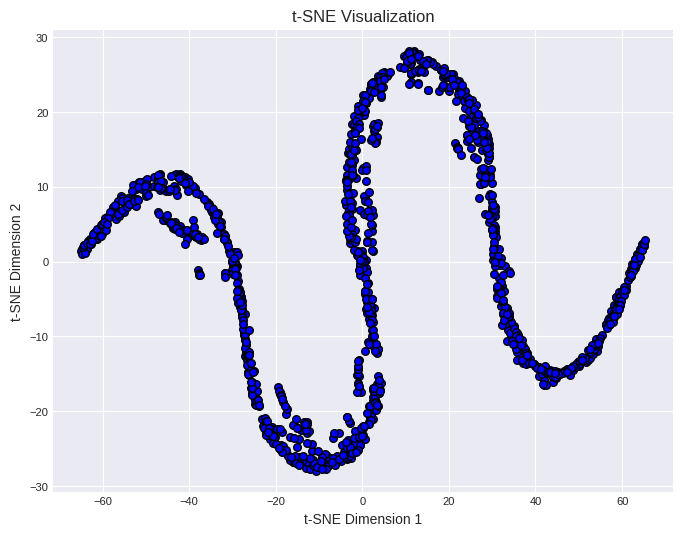

In [ ]:
# Assuming data_tsne is the result from your t-SNE code
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c='b', marker='o', s=30, edgecolors='k')

plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


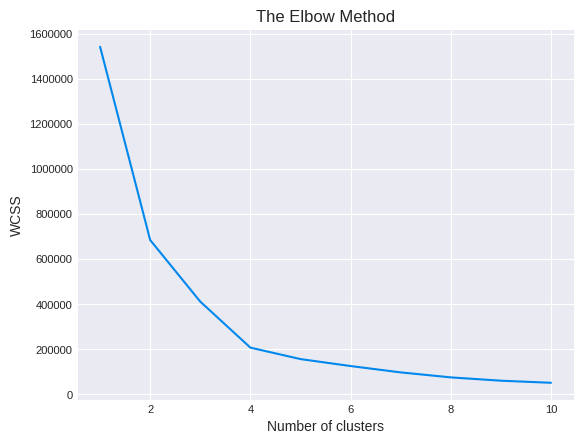

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
    kmeans.fit(data_tsne)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Building the Cluster

k_cluster=KMeans(2,random_state=20)
k_cluster.fit(data_tsne)
y_kmeans = kmeans.fit_predict(data_tsne)

In [ ]:
# Printing k_cluster.labels_

k_cluster.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

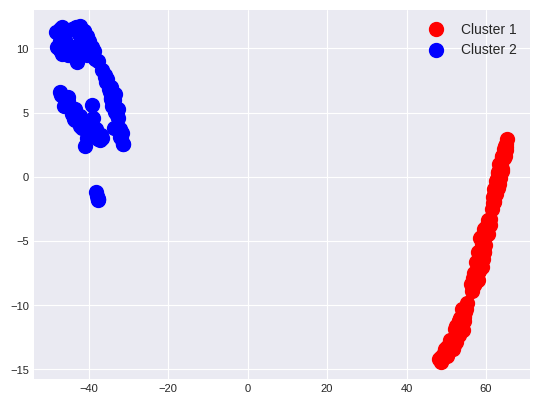

In [ ]:
plt.scatter(data_tsne[y_kmeans == 0, 0], data_tsne[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_kmeans == 1, 0], data_tsne[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.legend()

In [ ]:
s1_kmeans = silhouette_score(data_tsne,y_kmeans)
print('Silhouette Score for K-Means clustring :',s1_kmeans)

Silhouette Score for K-Means clustring : 0.51567453


In [ ]:
score_without_outlier_data= pd.DataFrame(columns=['Model Name','Silhouette Score','Data Distribution'])
score_without_outlier_data

Empty DataFrame
Columns: [Model Name, Silhouette Score, Data Distribution]
Index: []

In [ ]:
new_data = {'Model Name': 't-SNE ', 'Silhouette Score': '','Data Distribution':''}
score_without_outlier_data =score_without_outlier_data.append(new_data, ignore_index=True)
score_without_outlier_data

Model Name Silhouette Score Data Distribution
0     t-SNE

In [ ]:
new_data = {'Model Name': 'K-Means Clustering ', 'Silhouette Score': '0.51567','Data Distribution':'Equal'}
score_without_outlier_data =score_without_outlier_data.append(new_data, ignore_index=True)
score_without_outlier_data

Model Name Silhouette Score Data Distribution
0               t-SNE                                    
1  K-Means Clustering           0.51567             Equal

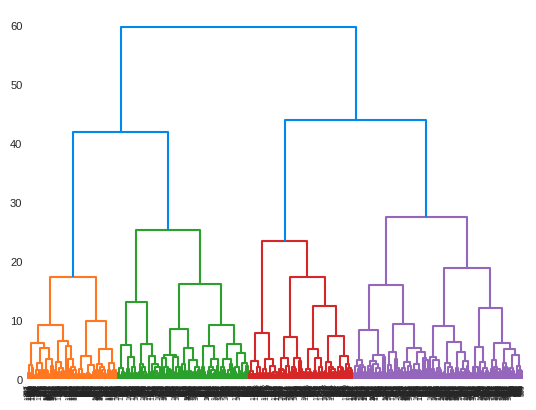

In [ ]:
# Dendogram is Plotted

dendo=sch.dendrogram(sch.linkage(data_tsne, method='average'))

In [ ]:
hc = AgglomerativeClustering(n_clusters =2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_tsne)

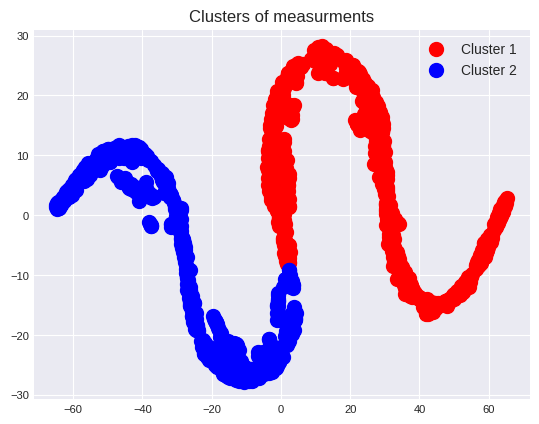

In [ ]:
plt.scatter(data_tsne[y_hc == 0, 0], data_tsne[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_hc == 1, 0], data_tsne[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [ ]:
s2_hierarchy = silhouette_score(data_tsne,y_hc)
print('Silhouette Score for Hierarchy clustring :',s2_hierarchy)

Silhouette Score for Hierarchy clustring : 0.46766293


In [ ]:
new_data = {'Model Name': 'Hierarchy Clustering ', 'Silhouette Score': '0.46766','Data Distribution':'Equal'}
score_without_outlier_data =score_without_outlier_data.append(new_data, ignore_index=True)
score_without_outlier_data

Model Name Silhouette Score Data Distribution
0                 t-SNE                                    
1    K-Means Clustering           0.51567             Equal
2  Hierarchy Clustering           0.46766             Equal

1.846043852370775
[[   0    1  554 ...  841 1110  840]
 [   1    0  554 ...  841 1110  840]
 [   2  186  709 ...  238  692  594]
 ...
 [1175  695  905 ...  739  738  742]
 [1176  736  740 ...  802    6  961]
 [1177  805  907 ...  604  697  955]]

 The distance of the data points which is nearest to 11th point
 [0.79915822 0.81294421 0.82542801 ... 4.99084907 5.02815181 5.10298101]


Text(0, 0.5, 'Distance')

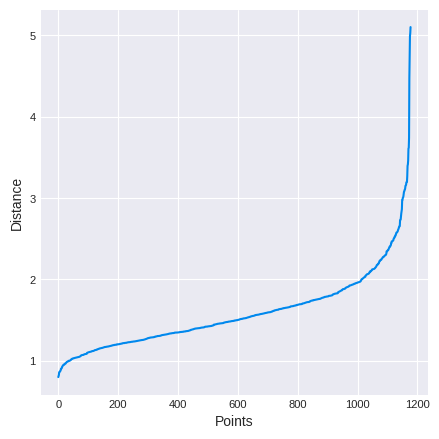

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data_tsne)             #Fitting the df_norm in nearest neighbors

distances, indices = neighbors.kneighbors(data_tsne)     #Finding of the distance and indices of the df_norm

print(distances[0,10])
print(indices)

distances = np.sort(distances[:,10], axis=0)   #Here the placing data points for 11th data point distance
print("\n The distance of the data points which is nearest to 11th point\n",distances)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

2.0648076287636328


<Figure size 500x500 with 0 Axes>

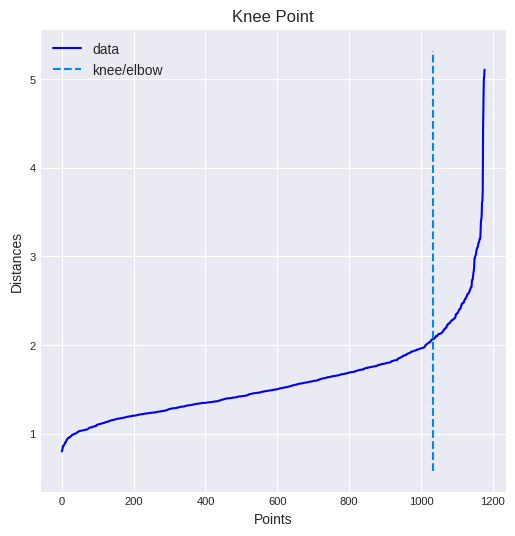

In [ ]:
#Plotting of the eps we use the knee plot using the kneed library

from kneed import KneeLocator     #importing the knee plot

i=np.arange(len(distances))    # 'i' is a variable where it contains the distance

# Implementing the knee method on distance
knee= KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
# Here, the 'i' is the array represent the X-axis
# Distance is the Y-axis and the dataset
# Sentivity(S) is a parameter used to control senstivity of the knee detection of the data, S larger than less senstivity
# Curve is type of curve should be fitting to the data. Here, the convex due there is a curve near the highest point in graph.
# Direction is a parameter in which the serach should be done either increasing (or) decreasing. Here, the increasing is used due to it is increasing plot.
# Interp_method is a interpolation method for dataset to plot the knee point, here it is polynomial

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distances")

print(distances[knee.knee])

In [ ]:
# Now considering the Eps and the Minpts

dbscan= DBSCAN(eps=1.9, min_samples=10)
cluster=dbscan.fit_predict(data_tsne)
silhouette_avg = silhouette_score(data_tsne, cluster, metric='euclidean')
silhouette_avg

0.100397184

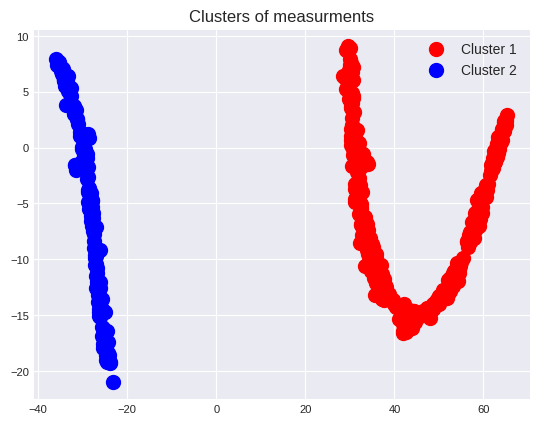

In [ ]:
plt.scatter(data_tsne[cluster == 0, 0], data_tsne[cluster == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[cluster == 1, 0], data_tsne[cluster == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [ ]:
new_data = {'Model Name': 'DBSCAN Clustering ', 'Silhouette Score': '0.10039','Data Distribution':'Equal'}
score_without_outlier_data =score_without_outlier_data.append(new_data, ignore_index=True)
score_without_outlier_data

Model Name Silhouette Score Data Distribution
0                 t-SNE                                    
1    K-Means Clustering           0.51567             Equal
2  Hierarchy Clustering           0.46766             Equal
3     DBSCAN Clustering           0.10039             Equal

### Trying with the pca

In [ ]:
rob_data

array([[-0.16901408,  4.24768965, -0.96590909, ...,  0.27214741,
        -0.24139785, -0.08093613],
       [-0.22535211,  4.06168595, -0.96590909, ...,  0.29482636,
        -0.24354839, -0.07898586],
       [-0.22535211,  4.39713683, -0.96590909, ...,  0.31750532,
        -0.23172043,  0.02632862],
       ...,
       [ 0.        ,  8.57281268,  0.94318182, ...,  1.07725018,
         0.37688172,  2.89322282],
       [-0.05633803,  8.35516073,  0.94318182, ...,  1.08291991,
         0.24462366,  2.67089225],
       [-0.05633803,  8.53702307,  0.94318182, ...,  1.08575478,
         0.55537634,  3.06679668]])

In [ ]:
from sklearn.decomposition import PCA

pca= PCA(n_components=3)

data_pca = pca.fit_transform(rob_data)

data_pca

array([[ 1.39576572,  3.45622463, -1.89669891],
       [ 1.34792009,  3.34791911, -1.85173396],
       [ 1.59675759,  3.51168929, -1.96171206],
       ...,
       [ 6.91380799,  4.94576462, -3.41425194],
       [ 6.44861948,  4.70736529, -3.4420371 ],
       [ 8.88957172,  5.46133488, -4.05716008]])

In [ ]:
pca.explained_variance_ratio_

array([0.56270426, 0.13818802, 0.07766543])

In [ ]:
cvar= np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
cvar

array([56.27, 70.09, 77.86])

Text(0, 0.5, 'Cummulative Varience % ')

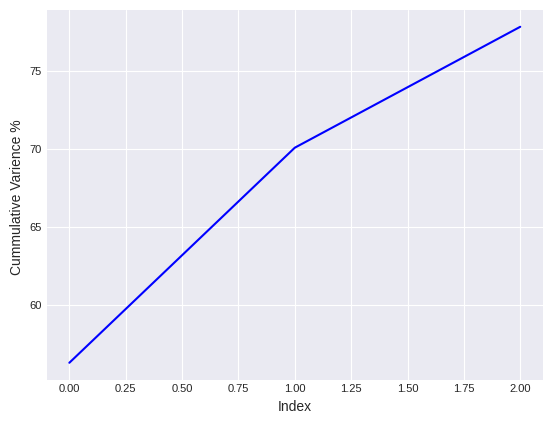

In [ ]:
plt.plot(cvar,color = 'blue')
plt.xlabel('Index')
plt.ylabel('Cummulative Varience % ')

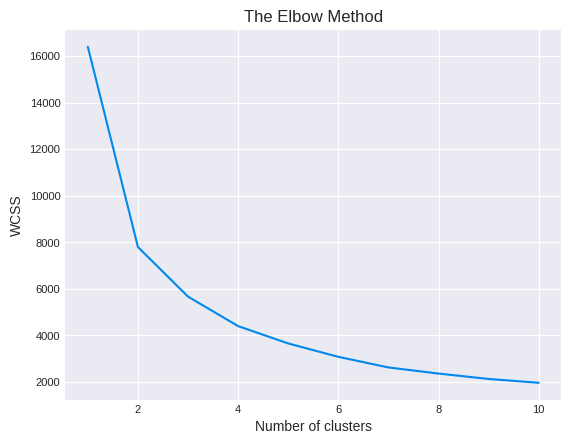

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Building the Cluster

k_cluster1=KMeans(2,random_state=20)
k_cluster1.fit(data_pca)
y_kmeans1 = kmeans.fit_predict(data_pca)

In [ ]:
k_cluster1.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

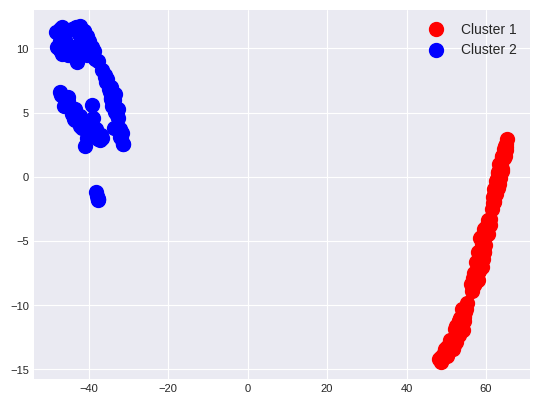

In [ ]:
plt.scatter(data_tsne[y_kmeans == 0, 0], data_tsne[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_kmeans == 1, 0], data_tsne[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.legend()

In [ ]:
s_kmeans1 = silhouette_score(data_pca,y_kmeans1)
print('Silhouette Score for K-Means clustring :',s_kmeans1)


Silhouette Score for K-Means clustring : 0.3575440670935645


In [ ]:
new_data = {'Model Name': 'PCA ', 'Silhouette Score': '','Data Distribution':''}
score_without_outlier_data =score_without_outlier_data.append(new_data, ignore_index=True)
score_without_outlier_data

Model Name Silhouette Score Data Distribution
0                 t-SNE                                    
1    K-Means Clustering           0.51567             Equal
2  Hierarchy Clustering           0.46766             Equal
3     DBSCAN Clustering           0.10039             Equal
4                   PCA

In [ ]:
new_data = {'Model Name': 'K-Means Clustering ', 'Silhouette Score': '0.35754','Data Distribution':'Equal'}
score_without_outlier_data =score_without_outlier_data.append(new_data, ignore_index=True)
score_without_outlier_data

Model Name Silhouette Score Data Distribution
0                 t-SNE                                    
1    K-Means Clustering           0.51567             Equal
2  Hierarchy Clustering           0.46766             Equal
3     DBSCAN Clustering           0.10039             Equal
4                   PCA                                    
5    K-Means Clustering           0.35754             Equal

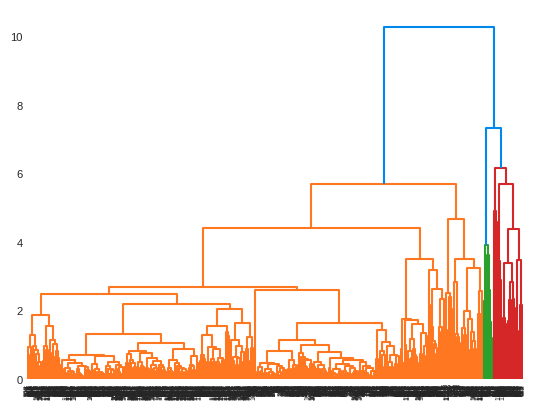

In [ ]:
# Dendogram is Plotted

dendo=sch.dendrogram(sch.linkage(data_pca, method='average'))

In [ ]:
hc1 = AgglomerativeClustering(n_clusters =2, affinity = 'euclidean', linkage = 'ward')
y_hc1 = hc.fit_predict(data_pca)

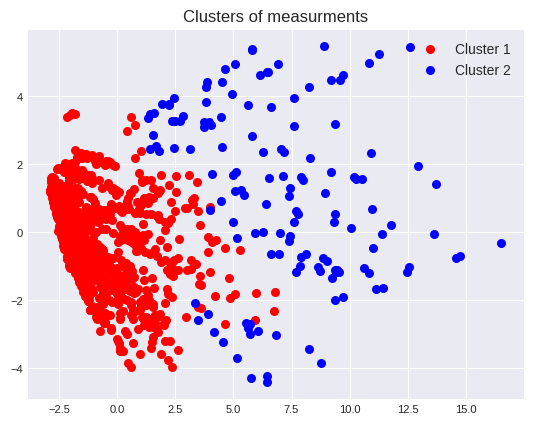

In [ ]:
plt.scatter(data_pca[y_hc1 == 0, 0], data_pca[y_hc1 == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_hc1 == 1, 0], data_pca[y_hc1 == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [ ]:
s_hierarchy2 = silhouette_score(data_pca,y_hc1)
print('Silhouette Score for Hierarchy clustring :',s_hierarchy2)

Silhouette Score for Hierarchy clustring : 0.6361075738883933


In [ ]:
new_data = {'Model Name': 'Hierarchy Clustering ', 'Silhouette Score': '0.63610','Data Distribution':'Equal'}
score_without_outlier_data =score_without_outlier_data.append(new_data, ignore_index=True)
score_without_outlier_data

Model Name Silhouette Score Data Distribution
0                 t-SNE                                    
1    K-Means Clustering           0.51567             Equal
2  Hierarchy Clustering           0.46766             Equal
3     DBSCAN Clustering           0.10039             Equal
4                   PCA                                    
5    K-Means Clustering           0.35754             Equal
6  Hierarchy Clustering           0.63610             Equal

1.150619641754705
[[   0    1    2 ...  689  449  691]
 [   1    0    2 ...  733  691  449]
 [   2    0    1 ...    4  690  689]
 ...
 [1175 1176 1174 ...    7  696  905]
 [1176 1174 1175 ...  696  735  695]
 [1177 1175 1176 ...  965  966  696]]

 The distance of the data points which is nearest to 11th point
 [0.09923546 0.11864937 0.12025286 ... 4.12026277 4.58433311 5.54232503]


Text(0, 0.5, 'Distance')

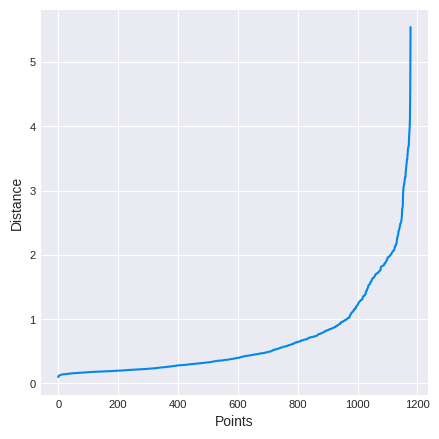

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data_pca)             #Fitting the df_norm in nearest neighbors

distances, indices = neighbors.kneighbors(data_pca)     #Finding of the distance and indices of the df_norm

print(distances[0,10])
print(indices)

distances = np.sort(distances[:,10], axis=0)   #Here the placing data points for 11th data point distance
print("\n The distance of the data points which is nearest to 11th point\n",distances)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

1.0222774121654243


<Figure size 500x500 with 0 Axes>

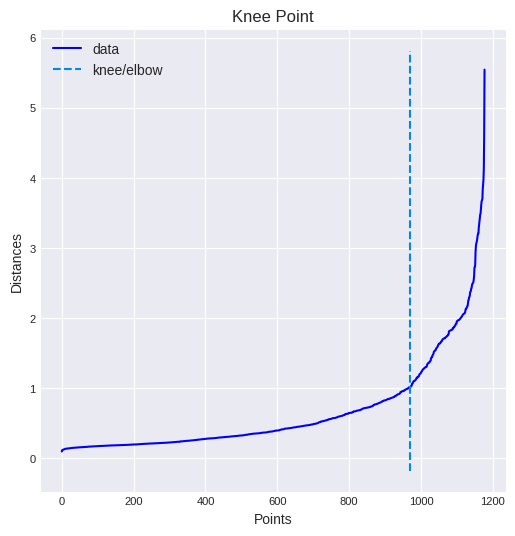

In [ ]:
#Plotting of the eps we use the knee plot using the kneed library

from kneed import KneeLocator     #importing the knee plot

i=np.arange(len(distances))    # 'i' is a variable where it contains the distance

# Implementing the knee method on distance
knee= KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
# Here, the 'i' is the array represent the X-axis
# Distance is the Y-axis and the dataset
# Sentivity(S) is a parameter used to control senstivity of the knee detection of the data, S larger than less senstivity
# Curve is type of curve should be fitting to the data. Here, the convex due there is a curve near the highest point in graph.
# Direction is a parameter in which the serach should be done either increasing (or) decreasing. Here, the increasing is used due to it is increasing plot.
# Interp_method is a interpolation method for dataset to plot the knee point, here it is polynomial

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distances")

print(distances[knee.knee])

In [ ]:
# Now considering the Eps and the Minpts

dbscan1= DBSCAN(eps=0.8, min_samples=10)
cluster1=dbscan1.fit_predict(data_pca)

silhouette_avg = silhouette_score(data_pca, cluster1, metric='euclidean')

silhouette_avg

0.31997743567432485

In [ ]:
cluster1

array([-1, -1, -1, ..., -1, -1, -1])

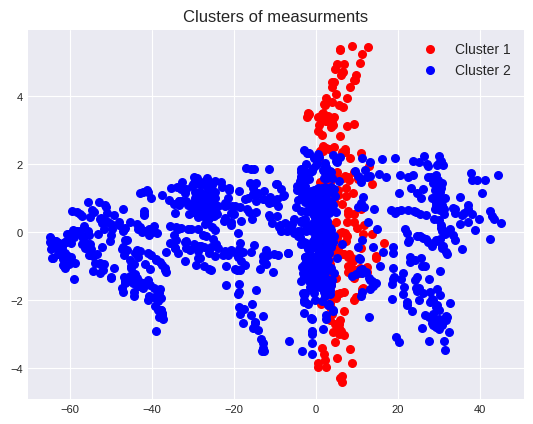

In [ ]:
plt.scatter(data_pca[cluster1 == -1, 0], data_pca[cluster1 == -1, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[cluster1 == 0, 0], data_pca[cluster1 == 0, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [ ]:
new_data = {'Model Name': 'DBSCAN Clustering ', 'Silhouette Score': '0.31997','Data Distribution':'Overlapping'}
score_without_outlier_data =score_without_outlier_data.append(new_data, ignore_index=True)
score_without_outlier_data

Model Name Silhouette Score Data Distribution
0                 t-SNE                                    
1    K-Means Clustering           0.51567             Equal
2  Hierarchy Clustering           0.46766             Equal
3     DBSCAN Clustering           0.10039             Equal
4                   PCA                                    
5    K-Means Clustering           0.35754             Equal
6  Hierarchy Clustering           0.63610             Equal
7     DBSCAN Clustering           0.31997       Overlapping

In [ ]:
score_with_outlier_data

Model Name Silhouette Score Data Distribution
0                       PCA                                   
1         DBSACN Clustering          0.20169    Most are Noise
2         DBSACN Clustering          0.47658    Most are Noise
3    KMeans Clustering(k=3)          0.84369           Unequal
4    KMeans Clustering(k=4)          0.83258           Unequal
5   Hierarchical Clustering          0.94334           Unequal
6                     t-SNE                                   
7    KMeans Clustering(k=3)          0.42291             Equal
8    KMeans Clustering(k=4)          0.45747             Equal
9    KMeans Clustering(k=5)          0.45203             Equal
10      Hierarchy Clustring          0.43433             Equal
11      Hierarchy Clustring         -0.10686             Equal
12        DBSACN Clustering          0.12803             Equal
13        DBSACN Clustering          0.30923             Equal

###The best Model we got is KMeans Clustering(with k=4)	by applying t-SNE(with outliers data)

In [ ]:
#data
scaled_data = RobustScaler().fit_transform(data_f)
data_tsne = TSNE(n_components=2).fit_transform(scaled_data)

In [ ]:
#k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=10)
y_kmeans = kmeans.fit_predict(data_tsne)

# The cluster labels are in 'y_kmeans'
print("Cluster Labels:", y_kmeans)
print('\nCluster Centers:', kmeans.cluster_centers_)
print()

# Silhouette score for k-means clustering
kmeans_score = silhouette_score(data_tsne, y_kmeans)
print(f'Silhouette Score for K-means Clustering: {kmeans_score}')
print('\n')

# Count the number of data points in each cluster
unique_labels, counts = np.unique(y_kmeans, return_counts=True)

# Display the count of each cluster
for label, count in zip(unique_labels, counts):
    print(f'Cluster {label} : {count} data points')


Cluster Labels: [3 3 3 ... 3 3 3]

Cluster Centers: [[-32.447132  24.255112]
 [ 22.362085 -23.815058]
 [-14.249911 -17.203077]
 [ 32.315536  18.83778 ]]

Silhouette Score for K-means Clustering: 0.45834067463874817


Cluster 0 : 425 data points
Cluster 1 : 405 data points
Cluster 2 : 499 data points
Cluster 3 : 414 data points


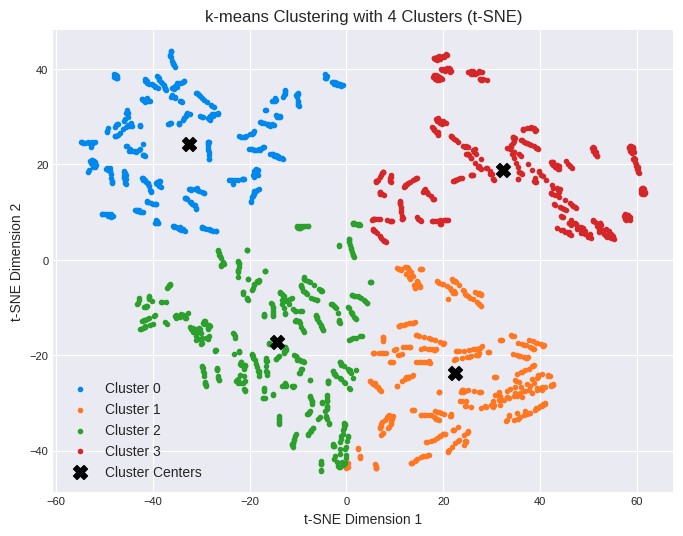

In [ ]:
plt.figure(figsize=(8,6))

# Scatter plot for each cluster
for label in range(4):
    cluster_points = data_tsne[y_kmeans == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')

# Plotting cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=100, label='Cluster Centers')

plt.title('k-means Clustering with 4 Clusters (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


Insights

In [ ]:
for i, center in enumerate(kmeans.cluster_centers_):
    cluster_data = data_tsne[y_kmeans == i]
    mean_values = np.mean(cluster_data, axis=0)
    std_values = np.std(cluster_data, axis=0)
    print(f"\nCluster {i+1} Statistics:")
    for feature, mean, std in zip(range(data_tsne.shape[1]), mean_values, std_values):
        print(f"Feature {feature+1}: Mean= {mean:.2f},  Std Dev= {std:.2f}")



Cluster 1 Statistics:
Feature 1: Mean= -32.45,  Std Dev= 13.28
Feature 2: Mean= 24.26,  Std Dev= 9.83

Cluster 2 Statistics:
Feature 1: Mean= 22.31,  Std Dev= 11.02
Feature 2: Mean= -23.86,  Std Dev= 10.67

Cluster 3 Statistics:
Feature 1: Mean= -14.28,  Std Dev= 12.46
Feature 2: Mean= -17.15,  Std Dev= 12.33

Cluster 4 Statistics:
Feature 1: Mean= 32.32,  Std Dev= 16.65
Feature 2: Mean= 18.84,  Std Dev= 10.15


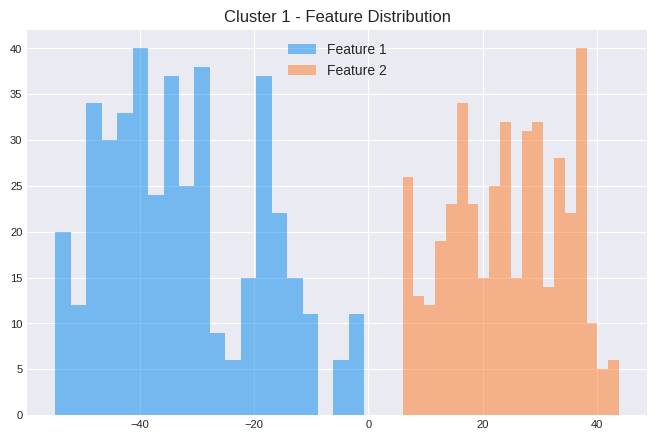

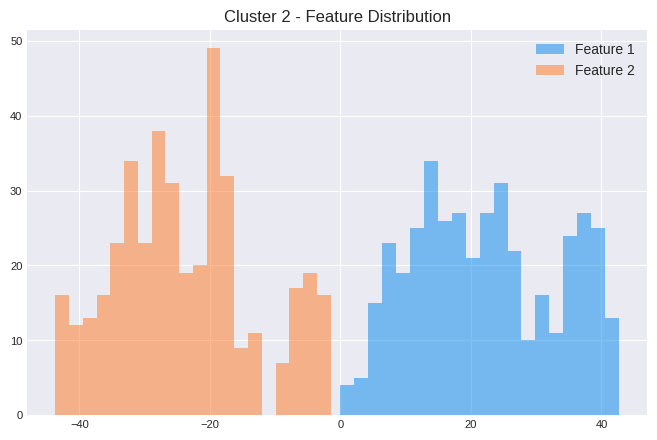

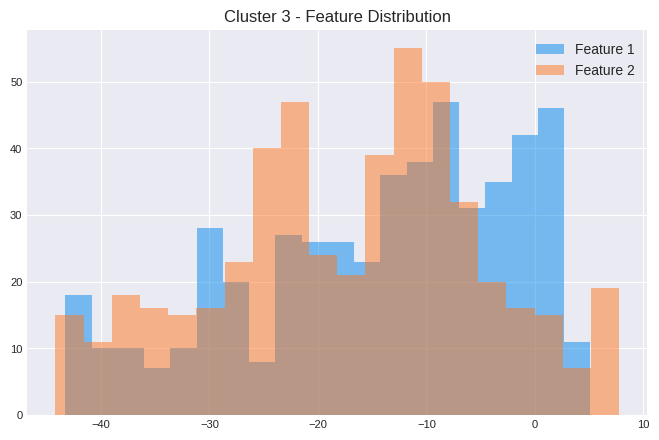

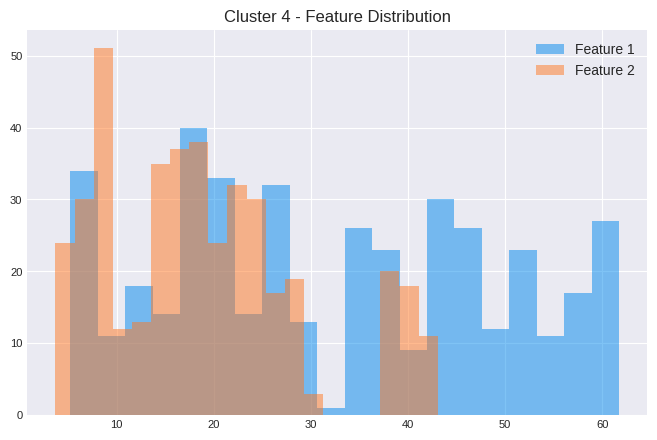

In [ ]:
for i in range(4):
    cluster_data = data_tsne[y_kmeans == i]
    plt.figure(figsize=(8,5))
    plt.title(f'Cluster {i+1} - Feature Distribution')
    for feature in range(data_tsne.shape[1]):
        plt.hist(cluster_data[:, feature], bins=20, alpha=0.5, label=f'Feature {feature+1}')
    plt.legend()
    plt.show()


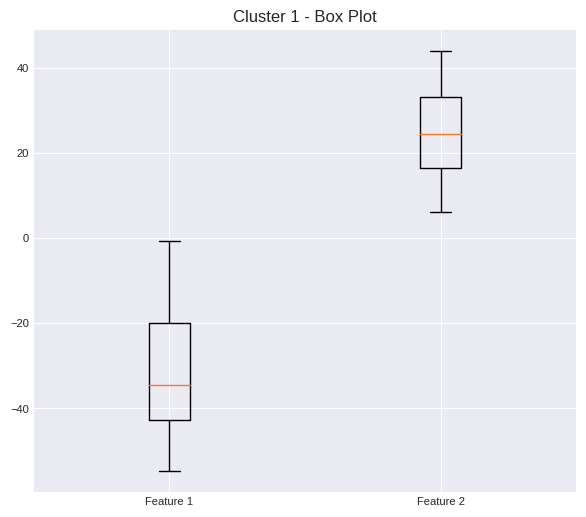

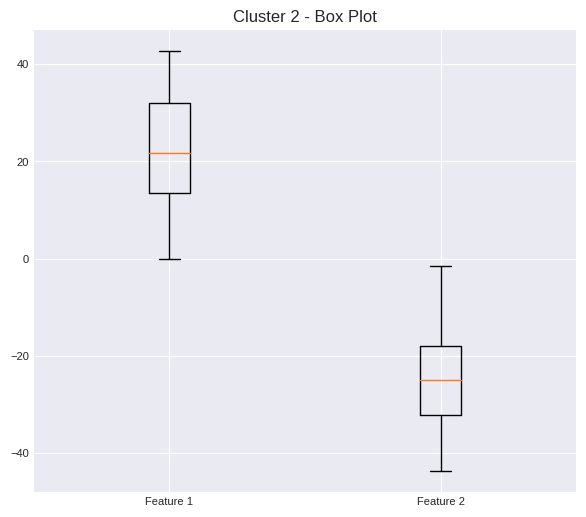

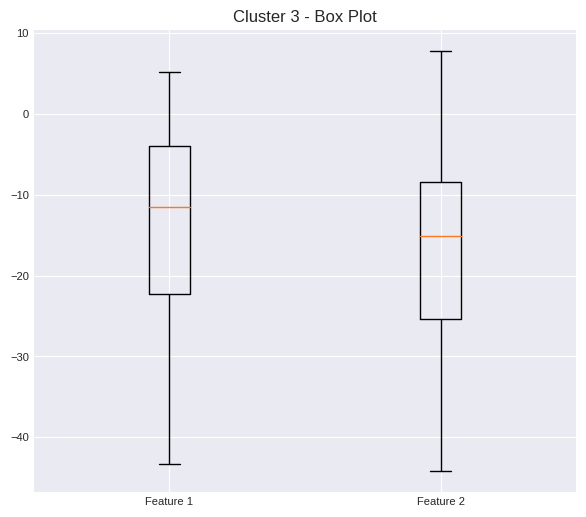

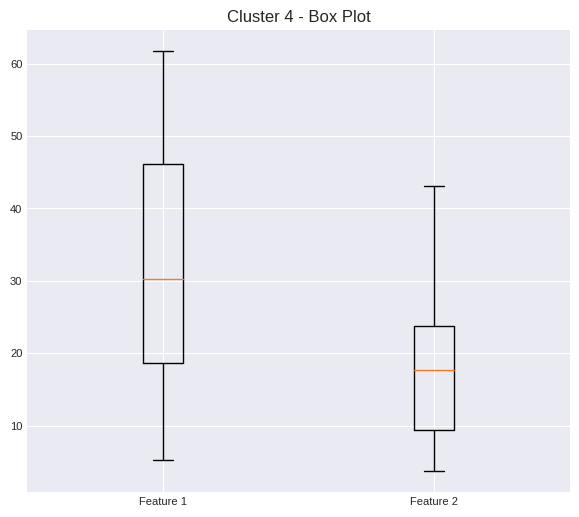

In [ ]:
for i in range(4):
    cluster_data = data_tsne[y_kmeans == i]
    plt.figure(figsize=(7,6))
    plt.title(f'Cluster {i+1} - Box Plot')
    plt.boxplot(cluster_data, labels=[f'Feature {j+1}' for j in range(data_tsne.shape[1])])
    plt.show()


In [ ]:
# Create a DataFrame with t-SNE coordinates and cluster labels
tsne_df = pd.DataFrame(data_tsne, columns=['tsne_1', 'tsne_2'])
tsne_df['Cluster'] = y_kmeans

# Display the first few rows of the DataFrame
print("\nDataFrame with t-SNE coordinates and Cluster labels:")
tsne_df.sample(5)


DataFrame with t-SNE coordinates and Cluster labels:


tsne_1     tsne_2  Cluster
1342  30.539083 -30.455648        1
945   -0.715396 -36.508675        2
1406 -13.905107 -34.501797        2
181  -29.862289  14.279572        0
1596  -6.720998  -8.242716        2

In [ ]:
tsne_df['Cluster'].value_counts()

2    499
0    425
3    414
1    405
Name: Cluster, dtype: int64

In [ ]:
data_f.groupby(tsne_df['Cluster']).agg(['mean'])

Birth Rate  CO2 Emissions     Country           GDP Health Exp % GDP  \
              mean           mean        mean          mean             mean   
Cluster                                                                        
0.0       0.034039   22290.387900   64.580071  3.177866e+10         0.056851   
1.0       0.018276  243560.628676   76.867647  3.209072e+11         0.059088   
2.0       0.019572  228677.365782  101.117994  3.866482e+11         0.075392   
3.0       0.021260  142690.542751   95.631970  1.872712e+11         0.065097   

        Health Exp/Capita Infant Mortality Rate Internet Usage  \
                     mean                  mean           mean   
Cluster                                                          
0.0            149.476868              0.061822       0.051601   
1.0            461.694853              0.025875       0.202941   
2.0           1451.324484              0.028581       0.315929   
3.0           1126.973978              0.032156       0.243494   

        Life Expectancy Female Life Expectancy Male Mobile Phone Usage  \
                          mean                 mean               mean   
Cluster                                                                  
0.0                  59.188612            56.056940           0.259431   
1.0                  74.095588            68.316176           0.490441   
2.0                  72.681416            68.094395           0.651327   
3.0                  70.449814            65.245353           0.590706   

        Population Total Population Urban Tourism Inbound Tourism Outbound  
                    mean             mean            mean             mean  
Cluster                                                                     
0.0         1.553143e+07         0.412242    1.338851e+09     5.835267e+08  
1.0         8.926530e+07         0.508919    4.178291e+09     4.414411e+09  
2.0         5.689123e+07         0.577867    7.908345e+09     7.494275e+09  
3.0         2.756958e+07         0.562093    5.261552e+09     4.476046e+09

In [ ]:
data_f.groupby(tsne_df['Cluster']).agg(['median'])

Birth Rate CO2 Emissions Country           GDP Health Exp % GDP  \
            median        median  median        median           median   
Cluster                                                                   
0.0          0.038        3095.0    56.0  7.178136e+09            0.053   
1.0          0.017       13788.0    72.0  1.689815e+10            0.060   
2.0          0.013       43956.0   109.0  4.885248e+10            0.072   
3.0          0.017       33883.0   100.0  5.205332e+10            0.063   

        Health Exp/Capita Infant Mortality Rate Internet Usage  \
                   median                median         median   
Cluster                                                          
0.0                  39.0                 0.065            0.0   
1.0                  94.5                 0.021            0.1   
2.0                 295.0                 0.012            0.3   
3.0                 183.0                 0.015            0.1   

        Life Expectancy Female Life Expectancy Male Mobile Phone Usage  \
                        median               median             median   
Cluster                                                                  
0.0                       56.0                 54.0               0.10   
1.0                       76.0                 68.0               0.45   
2.0                       76.0                 71.0               0.70   
3.0                       75.0                 68.0               0.60   

        Population Total Population Urban Tourism Inbound Tourism Outbound  
                  median           median          median           median  
Cluster                                                                     
0.0           10362722.0           0.4090    1.640000e+08     1.560000e+08  
1.0            9498500.0           0.5235    8.035000e+08     6.500000e+08  
2.0            9781900.0           0.6050    1.332000e+09     1.106000e+09  
3.0           10421137.0           0.5870    1.192000e+09     1.122000e+09

In [ ]:
# Assuming data3 is your DataFrame and tsne_df is another DataFrame with a 'Cluster' column
grouped_data = data_f['Country'].groupby(tsne_df['Cluster'])

# Get unique country names for each cluster
unique_countries_per_cluster = grouped_data.unique()

# Display the result
unique_countries_per_cluster


Cluster
0.0    [3, 17, 21, 25, 26, 28, 30, 31, 35, 37, 39, 44...
1.0    [52, 132, 134, 18, 23, 27, 33, 58, 71, 72, 79,...
2.0    [60, 91, 92, 96, 97, 108, 109, 115, 116, 130, ...
3.0    [2, 36, 37, 64, 90, 97, 100, 130, 136, 137, 14...
Name: Country, dtype: object

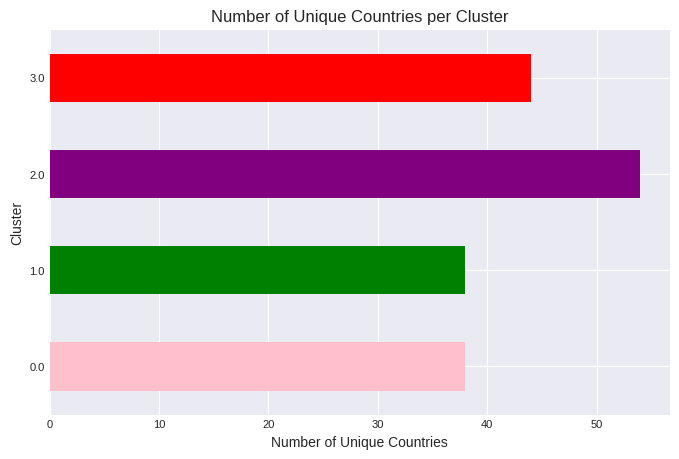

In [ ]:
# Count the number of unique countries per cluster
num_unique_countries = unique_countries_per_cluster.apply(len)

# Plotting a horizontal bar chart with a different color for each cluster
colors = ['pink', 'green', 'purple', 'red']
num_unique_countries.plot(kind='barh', color=colors, figsize=(8, 5))
plt.title('Number of Unique Countries per Cluster')
plt.xlabel('Number of Unique Countries')
plt.ylabel('Cluster')
plt.show()


In [ ]:
data_f['Country'].nunique()

174

In [ ]:
print(unique_countries_per_cluster.apply(len))
print('Total Countries:-',unique_countries_per_cluster.apply(len).sum())

Cluster
0.0    38
1.0    38
2.0    54
3.0    44
Name: Country, dtype: int64
Total Countries:- 174


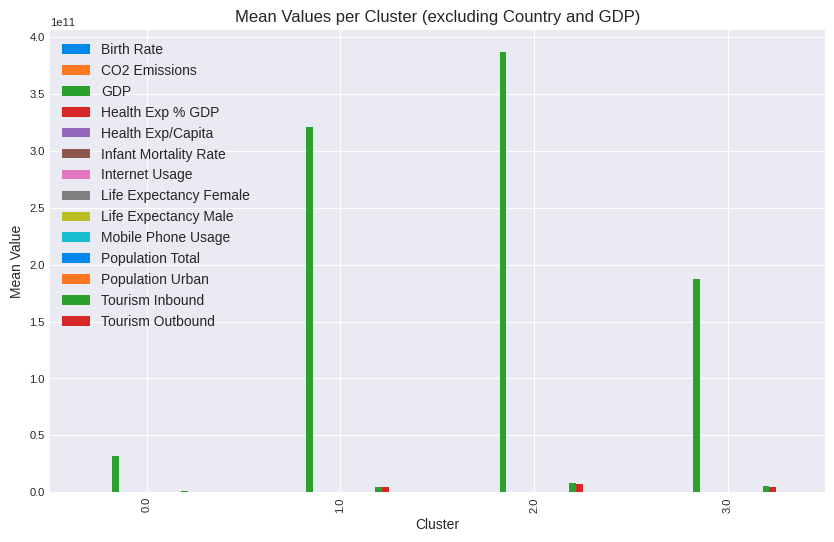

In [ ]:
grouped_means = data_f.drop(['Country'], axis=1).groupby(tsne_df['Cluster']).mean()

# Plotting a bar chart
grouped_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values per Cluster (excluding Country and GDP)')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.show()


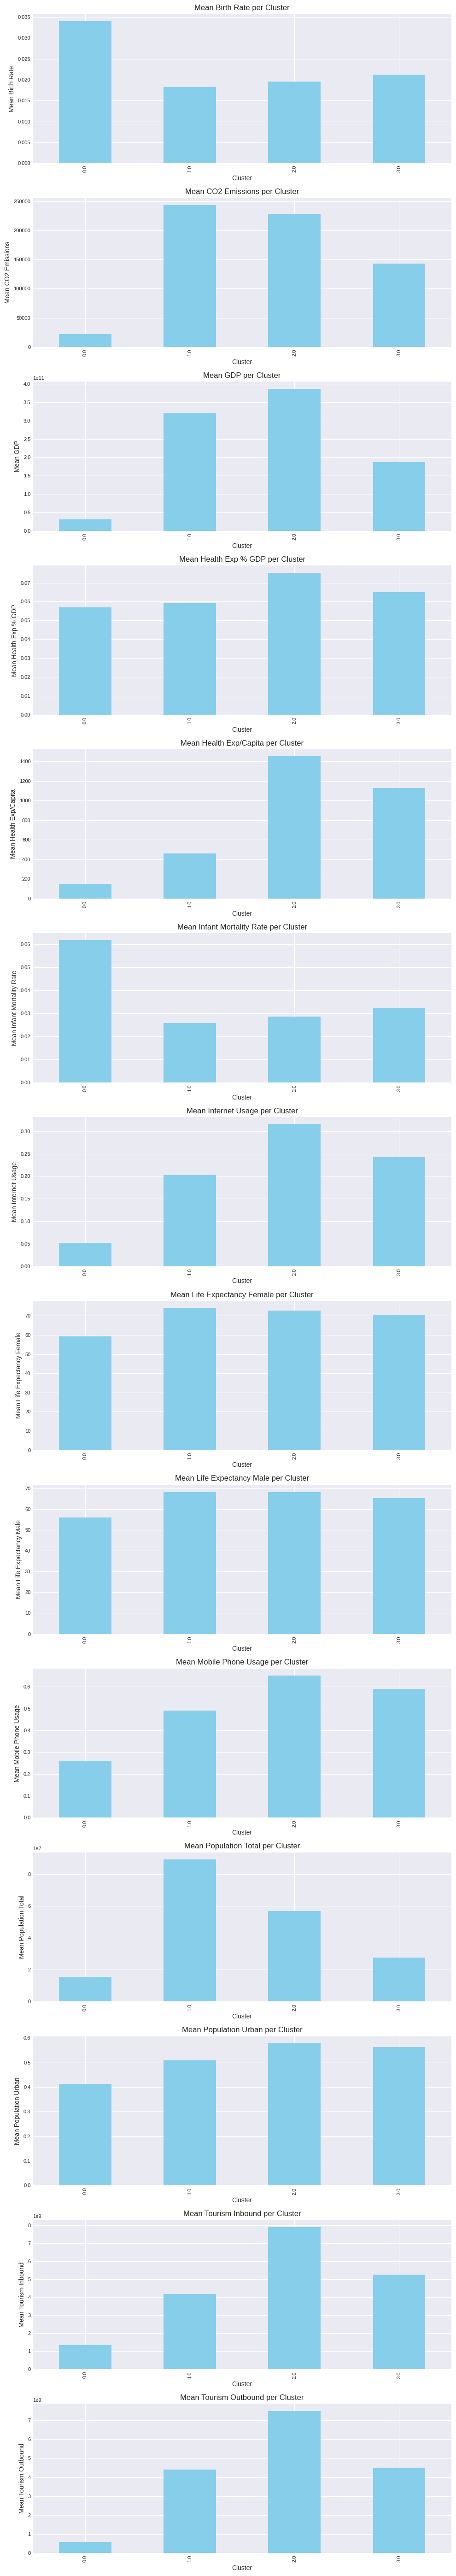

In [ ]:
grouped_means = data_f.drop(['Country'], axis=1).groupby(tsne_df['Cluster']).mean()

# Plotting individual graphs for each column
num_cols = len(grouped_means.columns)

fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 4*num_cols))

for i, column in enumerate(grouped_means.columns):
    ax = axes[i]
    grouped_means[column].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Mean {column} per Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(f'Mean {column}')
    ax.legend().set_visible(False)

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()
